<a href="https://colab.research.google.com/github/sankalpachowdhury/IT-Automation-Projects-/blob/master/Automated_Emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating the contents of the email or the PDF, attaching a file to an email, and even sending the email to an SMTP server. (MIME also)

**Python Email Library**
[Email_python](https://docs.python.org/3/library/email.html)
---



In [ ]:
from email.message import EmailMessage
message = EmailMessage()
print(message)

In [ ]:
sender = "me@example.com"
recipient = "you@example.com"
# define sender & recipient
#message['From'] = sender
#message['To'] = recipient

print(message)

From: me@example.com
To: you@example.com
Subject: Greetings from me@example.com to you@example.com!




In [ ]:
# message['Subject'] = 'Greetings from {} to {}!'.format(sender, recipient)
print(message)

From: me@example.com
To: you@example.com
Subject: Greetings from me@example.com to you@example.com!




In [ ]:
body = """Hey there! 
I'm learning to send emails using Python!"""
message.set_content(body)
print(message)

From: me@example.com
To: you@example.com
Subject: Greetings from me@example.com to you@example.com!
Content-Type: text/plain; charset="utf-8"
Content-Transfer-Encoding: 7bit
MIME-Version: 1.0

Hey there! 
I'm learning to send emails using Python!



The Content-Type and Content-Transfer-Encoding headers tell email clients and servers how to interpret the bytes in this email message into a string.

Email messages are made up completely of strings. When you add an attachment to an email, whatever type the attachment happens to be, it’s encoded as some form of text. The **Multipurpose Internet Mail Extensions (MIME)** standard is used to encode all sorts of files as text strings that can be sent via email. 

*   need to label the attachment with a MIME type and subtype to tell them what sort of file you’re sending
*   Internet Assigned Numbers Authority (IANA) (iana.org) hosts a registry of valid MIME types. If you know the correct type and subtype of the files you’ll be sending, you can use those values directly.


*    Python mimetypes module is used here.









In [ ]:
import os.path
attachment_path = "/content/DCGAN.png"
attachment_filename = os.path.basename(attachment_path)
import mimetypes
mime_type, _ = mimetypes.guess_type(attachment_path) # mime_type string contains the MIME type and subtype, separated by a slash
# mime_type, mime_subtype = mime_type.split('/', 1)
print(mime_type) 

image/png


In [ ]:
mime_type, mime_subtype = mime_type.split('/', 1)
with open(attachment_path, 'rb') as ap:
  message.add_attachment(ap.read(),
                         maintype=mime_type,
                         subtype=mime_subtype,
                         filename=os.path.basename(attachment_path))
 


In [ ]:
print(message)

From: me@example.com
To: you@example.com
Subject: Greetings from me@example.com to you@example.com!
MIME-Version: 1.0
Content-Type: multipart/mixed; boundary="===============4980963231533414010=="

--===============4980963231533414010==
Content-Type: text/plain; charset="utf-8"
Content-Transfer-Encoding: 7bit

Hey there! 
I'm learning to send emails using Python!

--===============4980963231533414010==
Content-Type: image/png
Content-Transfer-Encoding: base64
Content-Disposition: attachment; filename="DCGAN.png"
MIME-Version: 1.0

iVBORw0KGgoAAAANSUhEUgAABBkAAAFdCAYAAABGjrUvAAAABHNCSVQICAgIfAhkiAAAABl0RVh0
U29mdHdhcmUAZ25vbWUtc2NyZWVuc2hvdO8Dvz4AACAASURBVHic7J3nU9tZlv4fZSGhSBCSQEhk
MMkkG0dst9u4ZzrP9vTs1EztTtXW1k7tv7M182Jqp2pCT/9qQiento0TNhgwGGwySCCEhARKKGf9
XnjvHQlwt+12t9vu+6lyuQNI93u/N5x77nPO4WSz2SwYDAaDwWAwGAwGg8FgML4h3BfdAAaDwWAw
GAwGg8FgMBivBszJwGAwGAwGg8FgMBgMBuO5wJwMDAaDwWAwGAwGg8FgMJ4LzMnAYDAYDAaDwWAw
GAwG47nAnAwMBoPBYDAYDAaDwWAwngvMycBgMBgMBoPBYDAYDAbjucCcDAwGg8FgMBgMBoPBYDCe
C

The entire message can still be serialized as a text string, including the image that we attached! The email message as a whole has the MIME type "multipart/mixed". Each part of the message has its own MIME type. The message body is still there as a "text/plain" part, and the image attachment is a "image/png" part. Cool!


# SMTP Module 

In [1]:
import smtplib

In [2]:
mail_server = smtplib.SMTP('localhost')

OSError: ignored

 Connect to a remote SMTP server using Transport Layer Security (TLS). An earlier version of the TLS protocol was called Secure Sockets Layer (SSL)

1.    This SSL/TLS is the same protocol that's used to add a secure transmission layer to HTTP, making it HTTPS. 
2.    Two classes for making connections to an SMTP server: The SMTP class will make a direct SMTP connection, and the SMTP_SSL class will make a SMTP connection over SSL/TLS.



In [4]:
mail_server = smtplib.SMTP_SSL('sankalpachowdhury11@gmail.com')

gaierror: ignored

In [ ]:
mail_server.set_debuglevel(1)

In [ ]:
import getpass
mail_pass = getpass.getpass('Password? ')
# Password?
# give password here

It'sASecr3t!

In [ ]:
mail_server.login(sender, mail_pass)

In [ ]:
# to send the message
mail_server.send_message(message)

The send_message method returns a dictionary of any recipients that weren’t able to receive the message.

In [ ]:
mail_server.quit()

# Generating PDFs

to generate a PDF report at the end, which lets you decide exactly how you want your information to look like.

**ReportLab has a lot of different features for creating PDF documents.**

we'll be mostly using the high-level classes and methods in the **Page Layout and Typography Using Scripts (PLATYPUS)** part of the ReportLab module.

In [1]:
fruit = {
  "elderberries": 1,
  "figs": 1,
  "apples": 2,
  "durians": 3,
  "bananas": 5,
  "cherries": 8,
  "grapes": 13
}


In [2]:
!pip install --upgrade --force-reinstall reportlab


     |████████████████████████████████| 2.6MB 73kB/s 
     |████████████████████████████████| 2.2MB 10.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [11]:
# use the SimpleDocTemplate class to build our PDF.
from reportlab.platypus import SimpleDocTemplate
report = SimpleDocTemplate("/content/report.pdf")

Now, let's add some content to it! We'll create a title, some text in paragraphs, and some charts and images. For that, we're going to use what reportlab calls Flowables. Flowables are sort of like chunks of a document that reportlab can arrange to make a complete report. 

In [12]:
from reportlab.platypus import Paragraph, Spacer, Table, Image

In [13]:
# For style sheet

from reportlab.lib.styles import getSampleStyleSheet
styles = getSampleStyleSheet()

In [14]:
report_title = Paragraph("A Complete Inventory of My Fruit", styles["h1"])

In [5]:
# Generate the PDF report

report.build([report_title])

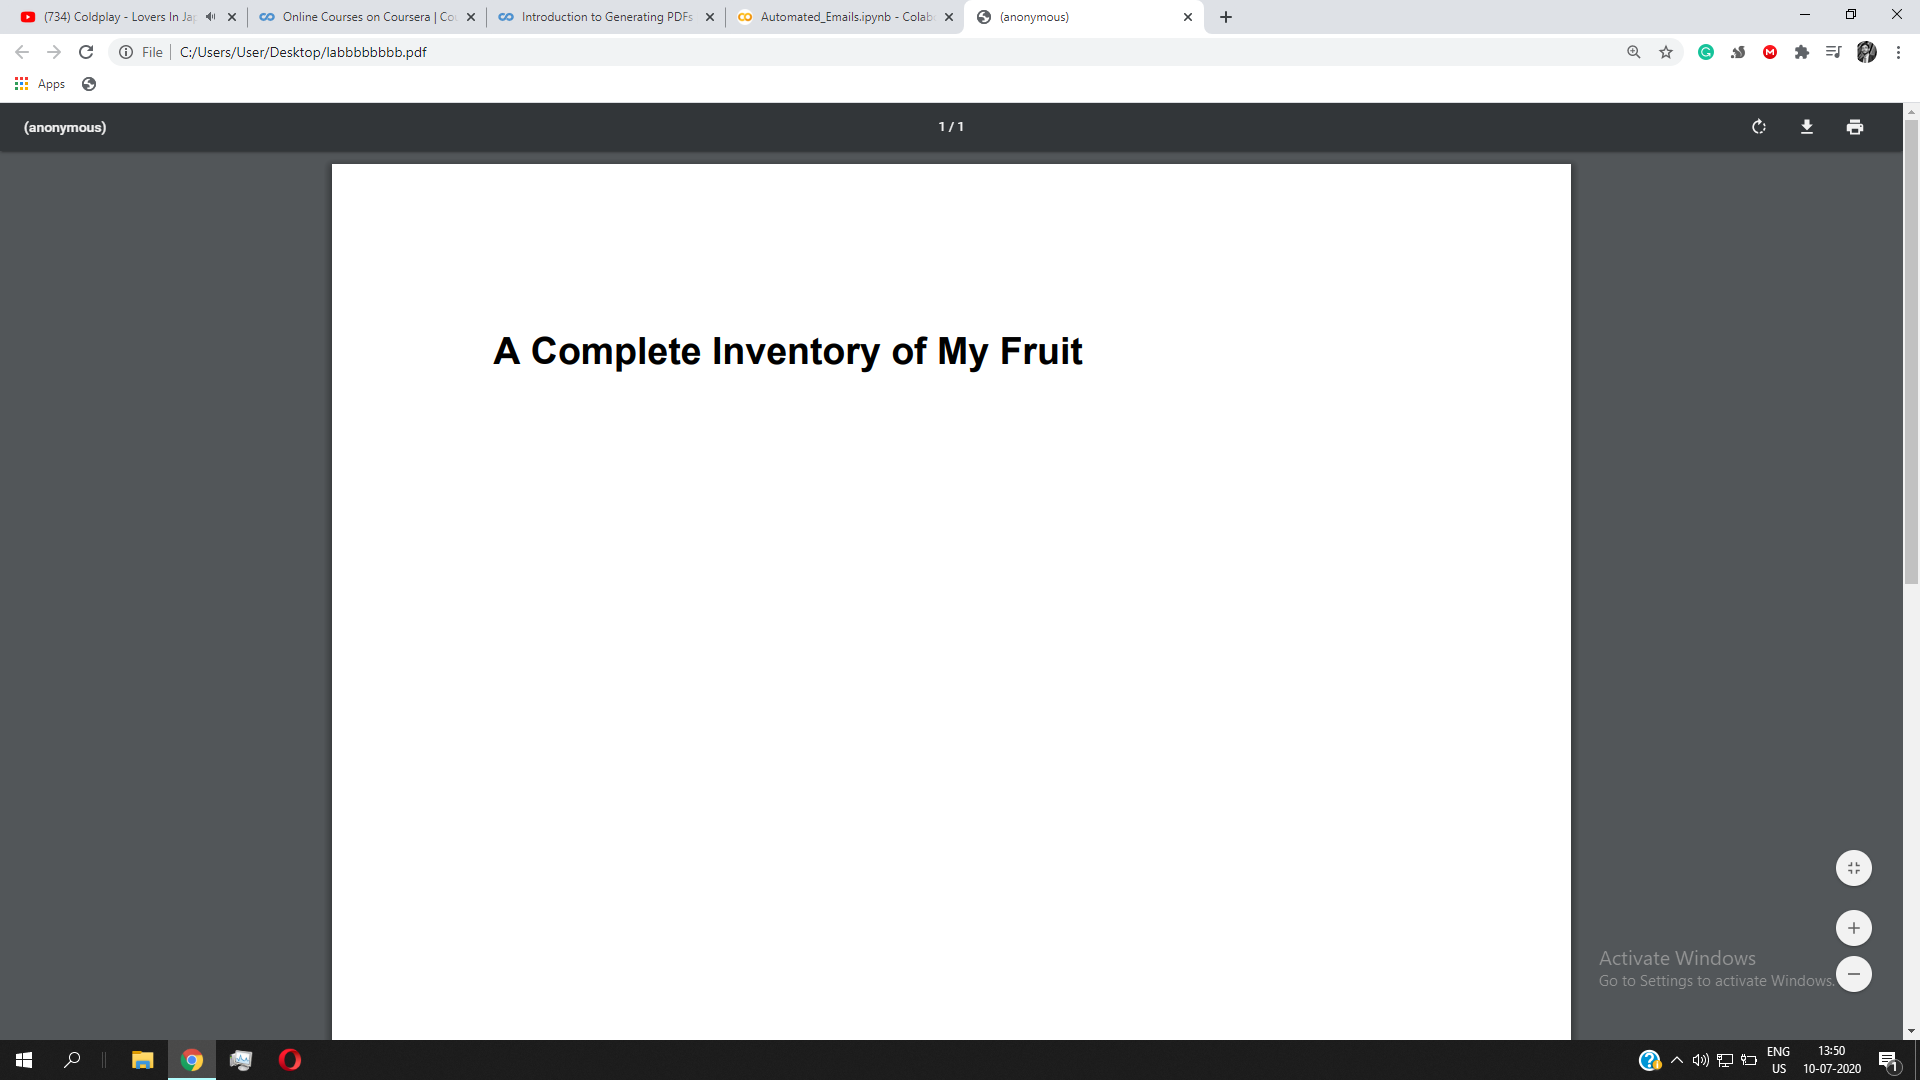




*   To make a Table object, we need our data to be in a list-of-lists, sometimes called a two-dimensional array. 

*   We have our inventory of fruit in a dictionary. How can we convert a dictionary into a list-of-lists?






In [7]:
fruit = {
  "elderberries": 1,
  "figs": 1,
  "apples": 2,
  "durians": 3,
  "bananas": 5,
  "cherries": 8,
  "grapes": 13
}


In [15]:
table_data = []
for k, v in fruit.items():
   table_data.append([k, v])

print(table_data)
#[['elderberries', 1], ['figs', 1], ['apples', 2], ['durians', 3], ['bananas', 5], ['cherries', 8], ['grapes', 13]]

[['elderberries', 1], ['figs', 1], ['apples', 2], ['durians', 3], ['bananas', 5], ['cherries', 8], ['grapes', 13]]


In [9]:
# without table
report_table = Table(data=table_data)
report.build([report_title, report_table])

In [16]:
# with table
from reportlab.lib import colors
table_style = [('GRID', (0,0), (-1,-1), 1, colors.black)]
report_table = Table(data=table_data, style=table_style, hAlign="LEFT")
report.build([report_title, report_table])

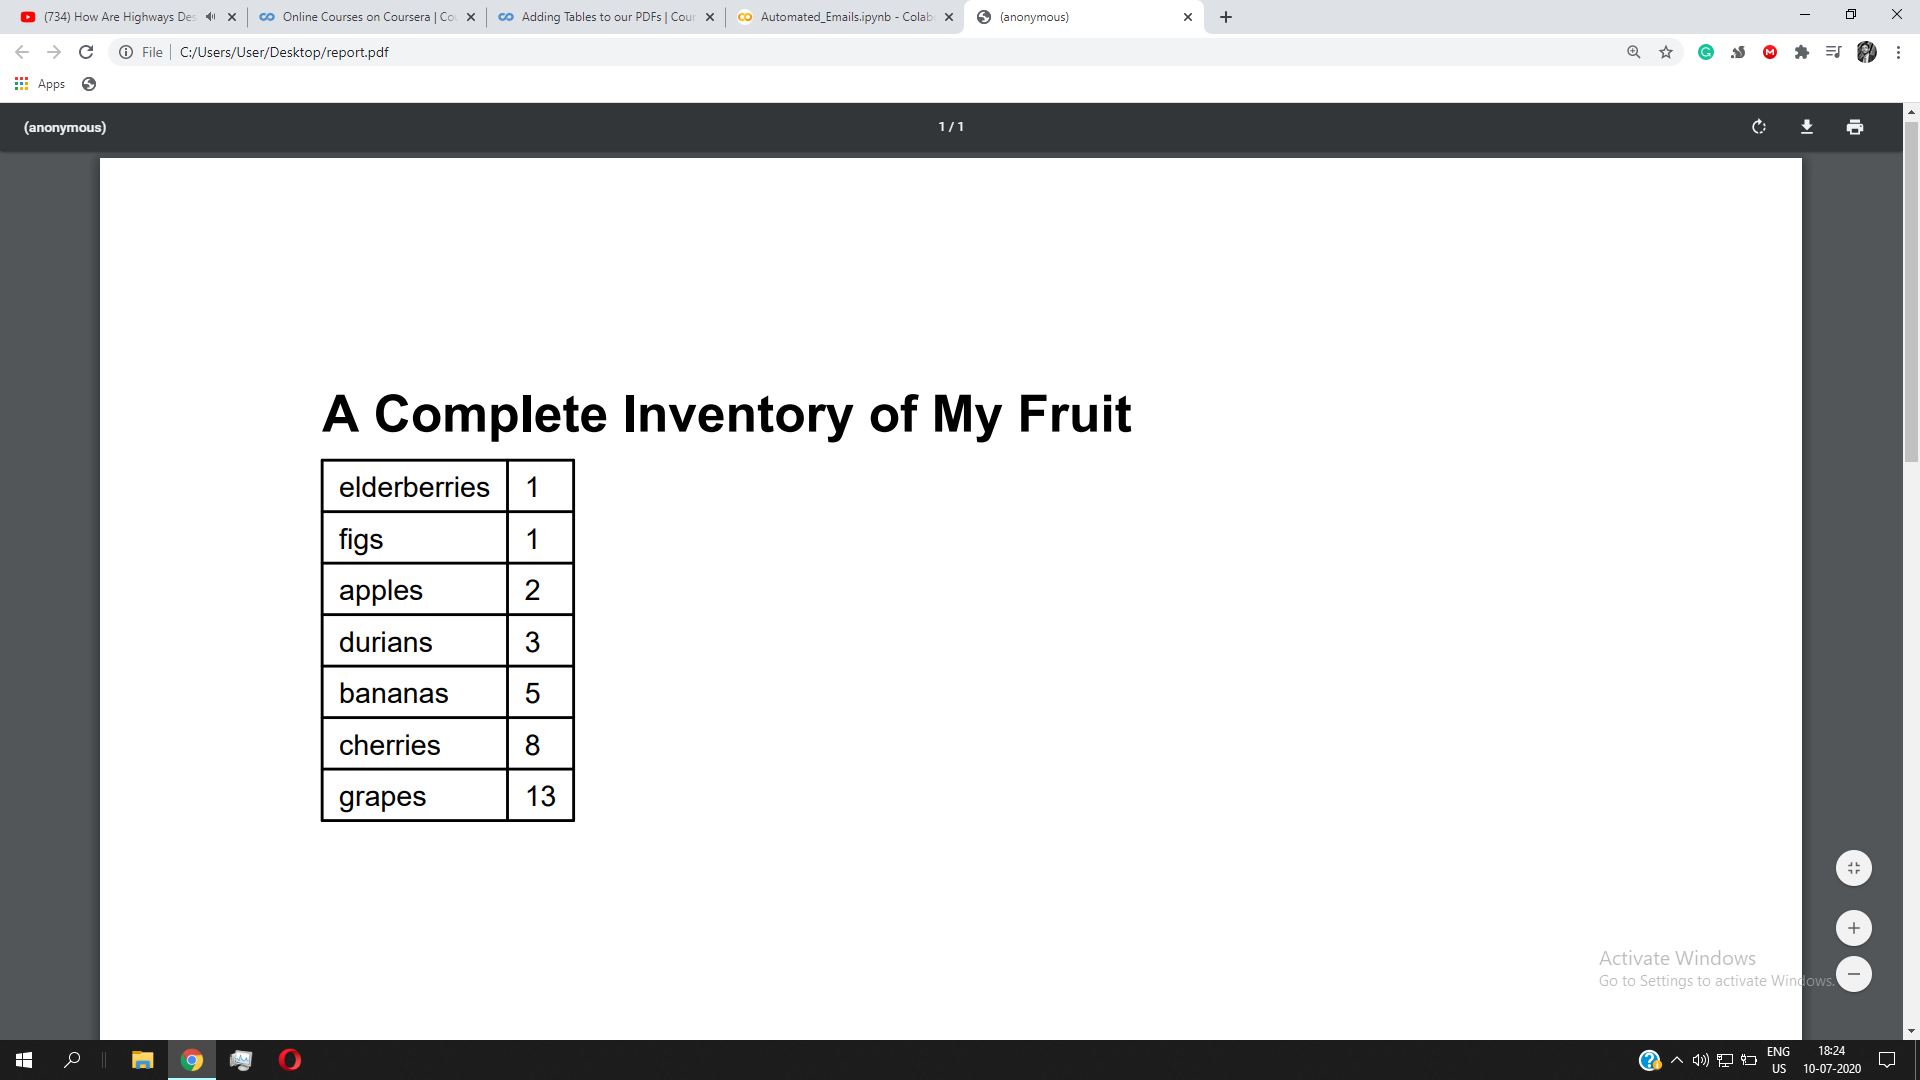


#Graphics to our PDFs

In [18]:
from reportlab.graphics.shapes import Drawing
from reportlab.graphics.charts.piecharts import Pie
report_pie = Pie(width=3*inch, height=3*inch)

NameError: ignored

In [ ]:
report_pie.data = []
report_pie.labels = []
for fruit_name in sorted(fruit):
  report_pie.data.append(fruit[fruit_name])
  report_pie.labels.append(fruit_name)

print(report_pie.data)
# [2, 5, 8, 3, 1, 1, 13]
print(report_pie.labels)
#['apples', 'bananas', 'cherries', 'durians', 'elderberries', 'figs', 'grapes']

In [ ]:
report_chart = Drawing()
report_chart.add(report_pie)

In [ ]:
report.build([report_title, report_table, report_chart])

# Problem Statement

 to process information related to the sales your company generated last month, and turn that into a nicely formatted PDF report that you'll then send by email 

# **Automatically Generate a PDF and send it by Email**

You work for a company that sells second hand cars. Management wants to get a summary of the amounts of vehicles that have been sold at the end of every month. The company already has a web service which serves sales data at the end of every month but management wants an email to be sent out with an attached PDF so that data is more easily readable.

In [ ]:
# car.py

#!/usr/bin/env python3

import json
import locale
import sys
from reports import generate as report
from emails import generate as email_generate
from emails import send as email_send


def load_data(filename):
    """Loads the contents of filename as a JSON file."""
    with open(filename) as json_file:
        new_data = json.load(json_file)
        data = sorted(new_data, key=lambda i: i['total_sales'])
    return data


def format_car(car):
    """Given a car dictionary, returns a nicely formatted name."""
    return "{} {} ({})".format(
        car["car_make"], car["car_model"], car["car_year"])


def process_data(data):
    """Analyzes the data, looking for maximums.

  Returns a list of lines that summarize the information.
  """
    locale.setlocale(locale.LC_ALL, 'en_US.UTF8')
    max_revenue = {"revenue": 0}
    sales = {"total_sales": 0}
    best_car = {}
    for item in data:
        # Calculate the revenue generated by this model (price * total_sales)
        # We need to convert the price from "$1234.56" to 1234.56
        item_price = locale.atof(item["price"].strip("$"))
        item_revenue = item["total_sales"] * item_price
        if item_revenue > max_revenue["revenue"]:
            item["revenue"] = item_revenue
            max_revenue = item
        # TODO: also handle max sales
        if item["total_sales"] > sales["total_sales"]:
            sales = item
        # TODO: also handle most popular car_year
        if not item["car"]["car_year"] in best_car.keys():
            best_car[item["car"]["car_year"]] = item["total_sales"]
        else:
            best_car[item["car"]["car_year"]] += item["total_sales"]

        all_values = best_car.values()
        max_value = max(all_values)
        max_key = max(best_car, key=best_car.get)

    summary = [
        "The {} generated the most revenue: ${}".format(
            format_car(max_revenue["car"]), max_revenue["revenue"]),
        "The {} had the most sales: {}".format(sales["car"]["car_model"], sales["total_sales"]),
        "The most popular year was {} with {} sales.".format(max_key, max_value),
    ]

    return summary


def cars_dict_to_table(car_data):
    """Turns the data in car_data into a list of lists."""
    table_data = [["ID", "Car", "Price", "Total Sales"]]
    for item in car_data:
        table_data.append([item["id"], format_car(item["car"]), item["price"], item["total_sales"]])
    return table_data


def main(argv):
    """Process the JSON data and generate a full report out of it."""
    data = load_data("/home/<username>/car_sales.json")
    summary = process_data(data)
    new_summary = '<br/>'.join(summary)
    print(summary)
    # TODO: turn this into a PDF report
    report('/tmp/cars.pdf', "Cars report", new_summary, cars_dict_to_table(data))
    # TODO: send the PDF report as an email attachment
    msg = email_generate("automation@example.com", "<username>@example.com",
                         "Sales summary for last month", new_summary, "/tmp/cars.pdf")
    email_send(msg)


if __name__ == "__main__":
    main(sys.argv)


In [ ]:
# emails.py

#!/usr/bin/env python3

import email.message
import mimetypes
import os.path
import smtplib

def generate(sender, recipient, subject, body, attachment_path):
  """Creates an email with an attachement."""
  # Basic Email formatting
  message = email.message.EmailMessage()
  message["From"] = sender
  message["To"] = recipient
  message["Subject"] = subject
  message.set_content(body)

  # Process the attachment and add it to the email
  attachment_filename = os.path.basename(attachment_path)
  mime_type, _ = mimetypes.guess_type(attachment_path)
  mime_type, mime_subtype = mime_type.split('/', 1)

  with open(attachment_path, 'rb') as ap:
    message.add_attachment(ap.read(),
                          maintype=mime_type,
                          subtype=mime_subtype,
                          filename=attachment_filename)

  return message

def send(message):
  """Sends the message to the configured SMTP server."""
  mail_server = smtplib.SMTP('localhost')
  mail_server.send_message(message)
  mail_server.quit()

In [ ]:
# example.py

#!/usr/bin/env python3

import emails
import os
import reports

table_data=[
  ['Name', 'Amount', 'Value'],
  ['elderberries', 10, 0.45],
  ['figs', 5, 3],
  ['apples', 4, 2.75],
  ['durians', 1, 25],
  ['bananas', 5, 1.99],
  ['cherries', 23, 5.80],
  ['grapes', 13, 2.48],
  ['kiwi', 4, 0.49]]
reports.generate("/tmp/report.pdf", "A Complete Inventory of My Fruit", "This is all my fruit.", table_data)

sender = "automation@example.com"
receiver = "{}@example.com".format(os.environ.get('USER'))
subject = "List of Fruits"
body = "Hi\n\nI'm sending an attachment with all my fruit."

message = emails.generate(sender, receiver, subject, body, "/tmp/report.pdf")
emails.send(message)

In [ ]:
# reports.py

#!/usr/bin/env python3

from reportlab.platypus import SimpleDocTemplate
from reportlab.platypus import Paragraph, Spacer, Table, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors

def generate(filename, title, additional_info, table_data):
  styles = getSampleStyleSheet()
  report = SimpleDocTemplate(filename)
  report_title = Paragraph(title, styles["h1"])
  report_info = Paragraph(additional_info, styles["BodyText"])
  table_style = [('GRID', (0,0), (-1,-1), 1, colors.black),
                ('FONTNAME', (0,0), (-1,0), 'Helvetica-Bold'),
                ('ALIGN', (0,0), (-1,-1), 'CENTER')]
  report_table = Table(data=table_data, style=table_style, hAlign="LEFT")
  empty_line = Spacer(1,20)
  report.build([report_title, empty_line, report_info, empty_line, report_table])

In [ ]:
# json file : cat_sales.json

[{"id":1,"car":{"car_make":"Ford","car_model":"Club Wagon","car_year":1997},"price":"$5179.39","total_sales":446},
{"id":2,"car":{"car_make":"Acura","car_model":"TL","car_year":2005},"price":"$14558.19","total_sales":589},
{"id":3,"car":{"car_make":"Volkswagen","car_model":"Jetta","car_year":2009},"price":"$14879.11","total_sales":825},
{"id":4,"car":{"car_make":"Chevrolet","car_model":"Uplander","car_year":2006},"price":"$17045.06","total_sales":689},
{"id":5,"car":{"car_make":"Plymouth","car_model":"Roadrunner","car_year":1969},"price":"$14770.44","total_sales":691},
{"id":6,"car":{"car_make":"GMC","car_model":"Safari","car_year":2000},"price":"$13390.83","total_sales":531},
{"id":7,"car":{"car_make":"Lamborghini","car_model":"Murciélago","car_year":2003},"price":"$7267.94","total_sales":374},
{"id":8,"car":{"car_make":"GMC","car_model":"3500","car_year":1999},"price":"$19292.10","total_sales":638},
{"id":9,"car":{"car_make":"Maybach","car_model":"62","car_year":2004},"price":"$11020.45","total_sales":945},
{"id":10,"car":{"car_make":"Chevrolet","car_model":"Cavalier","car_year":2001},"price":"$10708.87","total_sales":870},
{"id":11,"car":{"car_make":"Plymouth","car_model":"Acclaim","car_year":1993},"price":"$7734.63","total_sales":1158},
{"id":12,"car":{"car_make":"Buick","car_model":"Century","car_year":1991},"price":"$16905.08","total_sales":933},
{"id":13,"car":{"car_make":"Dodge","car_model":"Daytona","car_year":1984},"price":"$11540.36","total_sales":371},
{"id":14,"car":{"car_make":"Ford","car_model":"Econoline E350","car_year":1996},"price":"$19948.00","total_sales":1126},
{"id":15,"car":{"car_make":"Nissan","car_model":"Quest","car_year":2001},"price":"$12528.50","total_sales":536},
{"id":16,"car":{"car_make":"Toyota","car_model":"Yaris","car_year":2007},"price":"$10754.12","total_sales":573},
{"id":17,"car":{"car_make":"Maserati","car_model":"Spyder","car_year":2005},"price":"$18285.40","total_sales":224},
{"id":18,"car":{"car_make":"Ram","car_model":"Dakota","car_year":2011},"price":"$8792.39","total_sales":1135},
{"id":19,"car":{"car_make":"Mitsubishi","car_model":"Diamante","car_year":1995},"price":"$19173.71","total_sales":152},
{"id":20,"car":{"car_make":"Honda","car_model":"Accord","car_year":2001},"price":"$12123.05","total_sales":1063},
{"id":21,"car":{"car_make":"Mercury","car_model":"Sable","car_year":1991},"price":"$11226.09","total_sales":1118},
{"id":22,"car":{"car_make":"Toyota","car_model":"Previa","car_year":1991},"price":"$14361.62","total_sales":1048},
{"id":23,"car":{"car_make":"GMC","car_model":"Safari","car_year":1993},"price":"$10153.72","total_sales":354},
{"id":24,"car":{"car_make":"Suzuki","car_model":"SJ","car_year":1989},"price":"$14230.45","total_sales":1007},
{"id":25,"car":{"car_make":"Ford","car_model":"Ranger","car_year":1991},"price":"$14350.35","total_sales":299},
{"id":26,"car":{"car_make":"Suzuki","car_model":"Daewoo Magnus","car_year":2006},"price":"$9796.72","total_sales":408},
{"id":27,"car":{"car_make":"Chevrolet","car_model":"Impala","car_year":2005},"price":"$10738.89","total_sales":583},
{"id":28,"car":{"car_make":"Jeep","car_model":"Wrangler","car_year":2005},"price":"$17614.00","total_sales":1078},
{"id":29,"car":{"car_make":"Dodge","car_model":"Viper","car_year":2002},"price":"$11424.24","total_sales":342},
{"id":30,"car":{"car_make":"Acura","car_model":"RSX","car_year":2004},"price":"$5401.24","total_sales":167},
{"id":31,"car":{"car_make":"Hyundai","car_model":"Tiburon","car_year":2006},"price":"$14426.51","total_sales":939},
{"id":32,"car":{"car_make":"Honda","car_model":"Accord","car_year":2012},"price":"$9902.48","total_sales":802},
{"id":33,"car":{"car_make":"Honda","car_model":"Insight","car_year":2004},"price":"$11726.71","total_sales":688},
{"id":34,"car":{"car_make":"Toyota","car_model":"RAV4","car_year":2001},"price":"$7617.90","total_sales":582},
{"id":35,"car":{"car_make":"Subaru","car_model":"Baja","car_year":2004},"price":"$19187.15","total_sales":969},
{"id":36,"car":{"car_make":"Subaru","car_model":"XT","car_year":1990},"price":"$14957.47","total_sales":728},
{"id":37,"car":{"car_make":"Mitsubishi","car_model":"Challenger","car_year":2002},"price":"$5776.15","total_sales":998},
{"id":38,"car":{"car_make":"Jeep","car_model":"Grand Cherokee","car_year":2007},"price":"$5391.35","total_sales":783},
{"id":39,"car":{"car_make":"Saturn","car_model":"S-Series","car_year":2000},"price":"$9516.18","total_sales":238},
{"id":40,"car":{"car_make":"Mercedes-Benz","car_model":"CLK-Class","car_year":2008},"price":"$8800.11","total_sales":485},
{"id":41,"car":{"car_make":"Dodge","car_model":"Ram 1500 Club","car_year":1996},"price":"$10815.50","total_sales":884},
{"id":42,"car":{"car_make":"Suzuki","car_model":"Esteem","car_year":2000},"price":"$18873.59","total_sales":859},
{"id":43,"car":{"car_make":"Infiniti","car_model":"FX","car_year":2012},"price":"$14222.84","total_sales":263},
{"id":44,"car":{"car_make":"Pontiac","car_model":"Grand Prix","car_year":1968},"price":"$11359.74","total_sales":517},
{"id":45,"car":{"car_make":"Toyota","car_model":"RAV4","car_year":2011},"price":"$7438.50","total_sales":743},
{"id":46,"car":{"car_make":"Audi","car_model":"80","car_year":1992},"price":"$11851.42","total_sales":986},
{"id":47,"car":{"car_make":"Lamborghini","car_model":"Murciélago","car_year":2002},"price":"$13724.05","total_sales":149},
{"id":48,"car":{"car_make":"Mercedes-Benz","car_model":"SLK-Class","car_year":2000},"price":"$8106.25","total_sales":901},
{"id":49,"car":{"car_make":"Plymouth","car_model":"Voyager","car_year":1995},"price":"$15131.88","total_sales":825},
{"id":50,"car":{"car_make":"Toyota","car_model":"Tacoma","car_year":2012},"price":"$18860.22","total_sales":506},
{"id":51,"car":{"car_make":"Dodge","car_model":"Monaco","car_year":1992},"price":"$11757.22","total_sales":309},
{"id":52,"car":{"car_make":"Audi","car_model":"Q7","car_year":2011},"price":"$16834.25","total_sales":116},
{"id":53,"car":{"car_make":"Chevrolet","car_model":"Suburban 1500","car_year":2005},"price":"$6291.32","total_sales":222},
{"id":54,"car":{"car_make":"Ford","car_model":"Mustang","car_year":1983},"price":"$9188.30","total_sales":138},
{"id":55,"car":{"car_make":"Audi","car_model":"A6","car_year":2009},"price":"$13851.24","total_sales":846},
{"id":56,"car":{"car_make":"Dodge","car_model":"Challenger","car_year":2008},"price":"$11841.10","total_sales":241},
{"id":57,"car":{"car_make":"GMC","car_model":"Sonoma","car_year":1993},"price":"$9568.68","total_sales":511},
{"id":58,"car":{"car_make":"Jeep","car_model":"Cherokee","car_year":2001},"price":"$11339.87","total_sales":776},
{"id":59,"car":{"car_make":"Ford","car_model":"Windstar","car_year":2002},"price":"$9046.69","total_sales":908},
{"id":60,"car":{"car_make":"Chrysler","car_model":"Crossfire","car_year":2006},"price":"$19594.65","total_sales":434},
{"id":61,"car":{"car_make":"Cadillac","car_model":"Seville","car_year":1997},"price":"$8573.92","total_sales":127},
{"id":62,"car":{"car_make":"Volvo","car_model":"C30","car_year":2008},"price":"$5846.92","total_sales":958},
{"id":63,"car":{"car_make":"Mercury","car_model":"Capri","car_year":1986},"price":"$13327.58","total_sales":778},
{"id":64,"car":{"car_make":"Subaru","car_model":"XT","car_year":1986},"price":"$19889.02","total_sales":813},
{"id":65,"car":{"car_make":"Mercury","car_model":"Mountaineer","car_year":1999},"price":"$7792.50","total_sales":123},
{"id":66,"car":{"car_make":"Ford","car_model":"Courier","car_year":1986},"price":"$5701.75","total_sales":1088},
{"id":67,"car":{"car_make":"Hyundai","car_model":"Accent","car_year":2000},"price":"$19622.51","total_sales":791},
{"id":68,"car":{"car_make":"Toyota","car_model":"Sienna","car_year":2000},"price":"$7652.97","total_sales":823},
{"id":69,"car":{"car_make":"Lexus","car_model":"ES","car_year":2007},"price":"$8806.87","total_sales":564},
{"id":70,"car":{"car_make":"Toyota","car_model":"MR2","car_year":2004},"price":"$6048.42","total_sales":461},
{"id":71,"car":{"car_make":"BMW","car_model":"5 Series","car_year":2011},"price":"$10369.82","total_sales":824},
{"id":72,"car":{"car_make":"Maserati","car_model":"228","car_year":1990},"price":"$14897.24","total_sales":530},
{"id":73,"car":{"car_make":"Mitsubishi","car_model":"Tredia","car_year":1987},"price":"$14213.96","total_sales":512},
{"id":74,"car":{"car_make":"Ford","car_model":"E350","car_year":2004},"price":"$16624.86","total_sales":583},
{"id":75,"car":{"car_make":"Buick","car_model":"Park Avenue","car_year":1998},"price":"$12039.58","total_sales":868},
{"id":76,"car":{"car_make":"Audi","car_model":"A6","car_year":2003},"price":"$5275.04","total_sales":792},
{"id":77,"car":{"car_make":"Toyota","car_model":"Land Cruiser","car_year":2007},"price":"$11308.53","total_sales":801},
{"id":78,"car":{"car_make":"Ford","car_model":"Mustang","car_year":1991},"price":"$16726.63","total_sales":319},
{"id":79,"car":{"car_make":"Subaru","car_model":"Legacy","car_year":1999},"price":"$15360.12","total_sales":591},
{"id":80,"car":{"car_make":"Bentley","car_model":"Continental GT","car_year":2007},"price":"$5723.43","total_sales":1099},
{"id":81,"car":{"car_make":"Dodge","car_model":"Ram Van 1500","car_year":1999},"price":"$14757.58","total_sales":261},
{"id":82,"car":{"car_make":"Dodge","car_model":"Grand Caravan","car_year":2007},"price":"$12895.63","total_sales":288},
{"id":83,"car":{"car_make":"Mazda","car_model":"Mazda6","car_year":2008},"price":"$7491.58","total_sales":97},
{"id":84,"car":{"car_make":"Chevrolet","car_model":"Silverado 1500","car_year":2005},"price":"$12776.83","total_sales":999},
{"id":85,"car":{"car_make":"Mercedes-Benz","car_model":"SLK-Class","car_year":1999},"price":"$18050.61","total_sales":665},
{"id":86,"car":{"car_make":"Lotus","car_model":"Exige","car_year":2012},"price":"$7956.96","total_sales":919},
{"id":87,"car":{"car_make":"Infiniti","car_model":"QX","car_year":2010},"price":"$10483.43","total_sales":1037},
{"id":88,"car":{"car_make":"Jeep","car_model":"Commander","car_year":2007},"price":"$15352.07","total_sales":1155},
{"id":89,"car":{"car_make":"Ford","car_model":"Crown Victoria","car_year":2007},"price":"$6094.12","total_sales":826},
{"id":90,"car":{"car_make":"Land Rover","car_model":"Range Rover Sport","car_year":2007},"price":"$9907.57","total_sales":741},
{"id":91,"car":{"car_make":"Kia","car_model":"Optima","car_year":2007},"price":"$8031.77","total_sales":332},
{"id":92,"car":{"car_make":"Volvo","car_model":"V70","car_year":2004},"price":"$8202.06","total_sales":721},
{"id":93,"car":{"car_make":"Mazda","car_model":"Mazda5","car_year":2010},"price":"$19098.15","total_sales":596},
{"id":94,"car":{"car_make":"Suzuki","car_model":"Daewoo Lacetti","car_year":2008},"price":"$16875.37","total_sales":1088},
{"id":95,"car":{"car_make":"Nissan","car_model":"Sentra","car_year":1996},"price":"$5657.54","total_sales":318},
{"id":96,"car":{"car_make":"Chrysler","car_model":"Cirrus","car_year":1997},"price":"$9138.52","total_sales":235},
{"id":97,"car":{"car_make":"Honda","car_model":"CR-V","car_year":1997},"price":"$7294.37","total_sales":429},
{"id":98,"car":{"car_make":"Audi","car_model":"Allroad","car_year":2003},"price":"$13142.39","total_sales":889},
{"id":99,"car":{"car_make":"Infiniti","car_model":"QX","car_year":2006},"price":"$16068.30","total_sales":567},
{"id":100,"car":{"car_make":"Lamborghini","car_model":"Murciélago","car_year":2005},"price":"$5310.41","total_sales":594},
{"id":101,"car":{"car_make":"Kia","car_model":"Spectra","car_year":2003},"price":"$6715.38","total_sales":942},
{"id":102,"car":{"car_make":"Suzuki","car_model":"Daewoo Lacetti","car_year":2008},"price":"$19467.62","total_sales":448},
{"id":103,"car":{"car_make":"GMC","car_model":"Sierra 3500","car_year":2001},"price":"$9543.75","total_sales":502},
{"id":104,"car":{"car_make":"Jeep","car_model":"Wrangler","car_year":1992},"price":"$6324.31","total_sales":391},
{"id":105,"car":{"car_make":"Mitsubishi","car_model":"Tredia","car_year":1986},"price":"$5344.93","total_sales":899},
{"id":106,"car":{"car_make":"Acura","car_model":"Legend","car_year":1994},"price":"$7634.87","total_sales":414},
{"id":107,"car":{"car_make":"Ford","car_model":"F250","car_year":2000},"price":"$14135.66","total_sales":148},
{"id":108,"car":{"car_make":"Ford","car_model":"Lightning","car_year":1994},"price":"$8195.57","total_sales":900},
{"id":109,"car":{"car_make":"Ford","car_model":"Mustang","car_year":1995},"price":"$9642.12","total_sales":90},
{"id":110,"car":{"car_make":"Nissan","car_model":"Murano","car_year":2012},"price":"$5870.61","total_sales":933},
{"id":111,"car":{"car_make":"Subaru","car_model":"SVX","car_year":1995},"price":"$14469.19","total_sales":628},
{"id":112,"car":{"car_make":"Chevrolet","car_model":"Silverado","car_year":2002},"price":"$9959.02","total_sales":1142},
{"id":113,"car":{"car_make":"Volvo","car_model":"V40","car_year":2001},"price":"$7500.64","total_sales":799},
{"id":114,"car":{"car_make":"Mitsubishi","car_model":"GTO","car_year":1996},"price":"$11085.42","total_sales":872},
{"id":115,"car":{"car_make":"Audi","car_model":"Allroad","car_year":2004},"price":"$9212.97","total_sales":584},
{"id":116,"car":{"car_make":"Ford","car_model":"E150","car_year":2011},"price":"$14737.45","total_sales":442},
{"id":117,"car":{"car_make":"Honda","car_model":"CR-V","car_year":1998},"price":"$6428.83","total_sales":1050},
{"id":118,"car":{"car_make":"Plymouth","car_model":"Sundance","car_year":1992},"price":"$14528.14","total_sales":218},
{"id":119,"car":{"car_make":"Saab","car_model":"900","car_year":1991},"price":"$14346.52","total_sales":620},
{"id":120,"car":{"car_make":"Saab","car_model":"9000","car_year":1987},"price":"$13136.19","total_sales":868},
{"id":121,"car":{"car_make":"GMC","car_model":"Safari","car_year":1999},"price":"$17975.90","total_sales":529},
{"id":122,"car":{"car_make":"Pontiac","car_model":"Chevette","car_year":1987},"price":"$12139.89","total_sales":650},
{"id":123,"car":{"car_make":"Volkswagen","car_model":"GTI","car_year":1992},"price":"$17116.54","total_sales":458},
{"id":124,"car":{"car_make":"Toyota","car_model":"Venza","car_year":2010},"price":"$16294.62","total_sales":983},
{"id":125,"car":{"car_make":"Dodge","car_model":"Journey","car_year":2010},"price":"$12748.78","total_sales":905},
{"id":126,"car":{"car_make":"Volvo","car_model":"850","car_year":1996},"price":"$17098.86","total_sales":920},
{"id":127,"car":{"car_make":"Toyota","car_model":"Corolla","car_year":2001},"price":"$10607.80","total_sales":1086},
{"id":128,"car":{"car_make":"Mitsubishi","car_model":"Lancer","car_year":2010},"price":"$7407.25","total_sales":642},
{"id":129,"car":{"car_make":"Honda","car_model":"Passport","car_year":1999},"price":"$8067.95","total_sales":891},
{"id":130,"car":{"car_make":"Toyota","car_model":"T100 Xtra","car_year":1995},"price":"$19197.95","total_sales":263},
{"id":131,"car":{"car_make":"BMW","car_model":"8 Series","car_year":1995},"price":"$9266.77","total_sales":572},
{"id":132,"car":{"car_make":"Mazda","car_model":"Protege5","car_year":2003},"price":"$11961.88","total_sales":262},
{"id":133,"car":{"car_make":"Ford","car_model":"Th!nk","car_year":2002},"price":"$15722.23","total_sales":1054},
{"id":134,"car":{"car_make":"BMW","car_model":"X5 M","car_year":2010},"price":"$19247.20","total_sales":716},
{"id":135,"car":{"car_make":"BMW","car_model":"X5 M","car_year":2010},"price":"$7614.71","total_sales":1132},
{"id":136,"car":{"car_make":"Mitsubishi","car_model":"Diamante","car_year":2000},"price":"$10491.49","total_sales":522},
{"id":137,"car":{"car_make":"MINI","car_model":"Countryman","car_year":2011},"price":"$18185.92","total_sales":238},
{"id":138,"car":{"car_make":"Mercedes-Benz","car_model":"300SE","car_year":1993},"price":"$15177.02","total_sales":339},
{"id":139,"car":{"car_make":"GMC","car_model":"Safari","car_year":1997},"price":"$15131.36","total_sales":440},
{"id":140,"car":{"car_make":"Buick","car_model":"Regal","car_year":1995},"price":"$18414.93","total_sales":353},
{"id":141,"car":{"car_make":"Lincoln","car_model":"MKX","car_year":2009},"price":"$8662.69","total_sales":598},
{"id":142,"car":{"car_make":"Dodge","car_model":"Viper","car_year":2005},"price":"$11178.56","total_sales":804},
{"id":143,"car":{"car_make":"Cadillac","car_model":"Escalade","car_year":2005},"price":"$12285.62","total_sales":826},
{"id":144,"car":{"car_make":"Mercedes-Benz","car_model":"S-Class","car_year":1987},"price":"$19940.62","total_sales":1106},
{"id":145,"car":{"car_make":"Ford","car_model":"Explorer","car_year":2012},"price":"$15647.74","total_sales":752},
{"id":146,"car":{"car_make":"Ford","car_model":"F150","car_year":2009},"price":"$19812.23","total_sales":206},
{"id":147,"car":{"car_make":"Saturn","car_model":"Relay","car_year":2007},"price":"$10128.33","total_sales":595},
{"id":148,"car":{"car_make":"Toyota","car_model":"Yaris","car_year":2007},"price":"$19105.71","total_sales":1160},
{"id":149,"car":{"car_make":"Subaru","car_model":"Loyale","car_year":1992},"price":"$18565.87","total_sales":699},
{"id":150,"car":{"car_make":"Mazda","car_model":"B-Series","car_year":1986},"price":"$12063.44","total_sales":640},
{"id":151,"car":{"car_make":"Toyota","car_model":"Sienna","car_year":2006},"price":"$6910.58","total_sales":383},
{"id":152,"car":{"car_make":"Mercury","car_model":"Sable","car_year":1988},"price":"$10115.44","total_sales":942},
{"id":153,"car":{"car_make":"Hummer","car_model":"H2","car_year":2007},"price":"$7410.17","total_sales":733},
{"id":154,"car":{"car_make":"Subaru","car_model":"Loyale","car_year":1991},"price":"$9234.00","total_sales":923},
{"id":155,"car":{"car_make":"Dodge","car_model":"Ram 3500","car_year":2006},"price":"$9445.84","total_sales":814},
{"id":156,"car":{"car_make":"Aston Martin","car_model":"V8 Vantage","car_year":2008},"price":"$14647.21","total_sales":304},
{"id":157,"car":{"car_make":"Audi","car_model":"Allroad","car_year":2002},"price":"$11366.88","total_sales":667},
{"id":158,"car":{"car_make":"Toyota","car_model":"Xtra","car_year":1995},"price":"$12444.22","total_sales":1005},
{"id":159,"car":{"car_make":"Mazda","car_model":"B2600","car_year":1987},"price":"$6942.76","total_sales":216},
{"id":160,"car":{"car_make":"GMC","car_model":"Yukon XL 2500","car_year":2010},"price":"$18146.11","total_sales":168},
{"id":161,"car":{"car_make":"Audi","car_model":"Q7","car_year":2012},"price":"$9942.04","total_sales":1175},
{"id":162,"car":{"car_make":"Audi","car_model":"A4","car_year":2008},"price":"$8756.05","total_sales":1044},
{"id":163,"car":{"car_make":"Ford","car_model":"Mustang","car_year":2009},"price":"$5472.72","total_sales":603},
{"id":164,"car":{"car_make":"Audi","car_model":"S4","car_year":2002},"price":"$16024.61","total_sales":358},
{"id":165,"car":{"car_make":"Nissan","car_model":"GT-R","car_year":2009},"price":"$13699.83","total_sales":138},
{"id":166,"car":{"car_make":"Ford","car_model":"Bronco","car_year":1996},"price":"$11530.22","total_sales":695},
{"id":167,"car":{"car_make":"Mercedes-Benz","car_model":"Sprinter 3500","car_year":2012},"price":"$14785.53","total_sales":1004},
{"id":168,"car":{"car_make":"BMW","car_model":"7 Series","car_year":2003},"price":"$14113.33","total_sales":735},
{"id":169,"car":{"car_make":"Mercury","car_model":"Grand Marquis","car_year":2001},"price":"$14441.90","total_sales":786},
{"id":170,"car":{"car_make":"Subaru","car_model":"Outback","car_year":2002},"price":"$16236.19","total_sales":923},
{"id":171,"car":{"car_make":"Acura","car_model":"RDX","car_year":2007},"price":"$18319.30","total_sales":230},
{"id":172,"car":{"car_make":"Ford","car_model":"Taurus X","car_year":2009},"price":"$7562.01","total_sales":1158},
{"id":173,"car":{"car_make":"Toyota","car_model":"Tacoma Xtra","car_year":2000},"price":"$8219.08","total_sales":878},
{"id":174,"car":{"car_make":"Chevrolet","car_model":"Camaro","car_year":1982},"price":"$12129.61","total_sales":884},
{"id":175,"car":{"car_make":"Hyundai","car_model":"Azera","car_year":2011},"price":"$14530.91","total_sales":977},
{"id":176,"car":{"car_make":"Chevrolet","car_model":"Avalanche 2500","car_year":2004},"price":"$7363.73","total_sales":539},
{"id":177,"car":{"car_make":"Volkswagen","car_model":"Cabriolet","car_year":1993},"price":"$18267.42","total_sales":779},
{"id":178,"car":{"car_make":"Mercedes-Benz","car_model":"E-Class","car_year":2010},"price":"$16417.94","total_sales":1134},
{"id":179,"car":{"car_make":"Mercedes-Benz","car_model":"500SEC","car_year":1993},"price":"$5355.40","total_sales":1020},
{"id":180,"car":{"car_make":"Lotus","car_model":"Esprit","car_year":1995},"price":"$14238.35","total_sales":948},
{"id":181,"car":{"car_make":"Chrysler","car_model":"Sebring","car_year":2004},"price":"$16839.92","total_sales":879},
{"id":182,"car":{"car_make":"Isuzu","car_model":"Space","car_year":1994},"price":"$19221.52","total_sales":166},
{"id":183,"car":{"car_make":"Mazda","car_model":"626","car_year":1990},"price":"$19030.81","total_sales":715},
{"id":184,"car":{"car_make":"Mitsubishi","car_model":"3000GT","car_year":1998},"price":"$14159.89","total_sales":541},
{"id":185,"car":{"car_make":"Land Rover","car_model":"Range Rover","car_year":2004},"price":"$19278.62","total_sales":1045},
{"id":186,"car":{"car_make":"Land Rover","car_model":"Range Rover","car_year":1993},"price":"$17608.07","total_sales":216},
{"id":187,"car":{"car_make":"Chevrolet","car_model":"Tahoe","car_year":1995},"price":"$13293.55","total_sales":120},
{"id":188,"car":{"car_make":"Mitsubishi","car_model":"Diamante","car_year":2001},"price":"$12613.98","total_sales":259},
{"id":189,"car":{"car_make":"BMW","car_model":"X5 M","car_year":2013},"price":"$13743.18","total_sales":844},
{"id":190,"car":{"car_make":"Saab","car_model":"9-3","car_year":2001},"price":"$11979.51","total_sales":213},
{"id":191,"car":{"car_make":"Cadillac","car_model":"Escalade ESV","car_year":2009},"price":"$11783.87","total_sales":968},
{"id":192,"car":{"car_make":"Volkswagen","car_model":"Phaeton","car_year":2004},"price":"$15047.90","total_sales":488},
{"id":193,"car":{"car_make":"Suzuki","car_model":"Esteem","car_year":2002},"price":"$9796.59","total_sales":836},
{"id":194,"car":{"car_make":"Chrysler","car_model":"Pacifica","car_year":2007},"price":"$8226.83","total_sales":802},
{"id":195,"car":{"car_make":"Ford","car_model":"Fairlane","car_year":1966},"price":"$10154.10","total_sales":235},
{"id":196,"car":{"car_make":"Buick","car_model":"Rainier","car_year":2004},"price":"$15671.21","total_sales":218},
{"id":197,"car":{"car_make":"Chevrolet","car_model":"Colorado","car_year":2011},"price":"$7870.28","total_sales":171},
{"id":198,"car":{"car_make":"Dodge","car_model":"Stealth","car_year":1995},"price":"$6601.15","total_sales":520},
{"id":199,"car":{"car_make":"Mazda","car_model":"MX-6","car_year":1993},"price":"$14923.53","total_sales":371},
{"id":200,"car":{"car_make":"Saab","car_model":"9-3","car_year":2012},"price":"$17007.37","total_sales":244},
{"id":201,"car":{"car_make":"Dodge","car_model":"Ram 3500","car_year":2010},"price":"$14413.97","total_sales":156},
{"id":202,"car":{"car_make":"Mitsubishi","car_model":"L300","car_year":1990},"price":"$12528.18","total_sales":270},
{"id":203,"car":{"car_make":"Pontiac","car_model":"Bonneville","car_year":1997},"price":"$13971.05","total_sales":355},
{"id":204,"car":{"car_make":"Volkswagen","car_model":"Phaeton","car_year":2005},"price":"$18421.03","total_sales":361},
{"id":205,"car":{"car_make":"Ford","car_model":"Escort","car_year":1997},"price":"$9921.91","total_sales":655},
{"id":206,"car":{"car_make":"Mazda","car_model":"Mazda5","car_year":2006},"price":"$19775.00","total_sales":187},
{"id":207,"car":{"car_make":"Hummer","car_model":"H2","car_year":2007},"price":"$19820.64","total_sales":675},
{"id":208,"car":{"car_make":"Lexus","car_model":"ES","car_year":2011},"price":"$8119.86","total_sales":776},
{"id":209,"car":{"car_make":"Chevrolet","car_model":"Camaro","car_year":1970},"price":"$10485.60","total_sales":309},
{"id":210,"car":{"car_make":"Mercury","car_model":"Mariner","car_year":2008},"price":"$5266.65","total_sales":279},
{"id":211,"car":{"car_make":"Lotus","car_model":"Exige","car_year":2012},"price":"$8019.74","total_sales":839},
{"id":212,"car":{"car_make":"Mazda","car_model":"CX-9","car_year":2008},"price":"$15775.22","total_sales":734},
{"id":213,"car":{"car_make":"Toyota","car_model":"Venza","car_year":2012},"price":"$8224.49","total_sales":1128},
{"id":214,"car":{"car_make":"Daewoo","car_model":"Leganza","car_year":1999},"price":"$15357.60","total_sales":672},
{"id":215,"car":{"car_make":"Mercury","car_model":"Grand Marquis","car_year":2002},"price":"$6722.39","total_sales":1031},
{"id":216,"car":{"car_make":"Jaguar","car_model":"XK","car_year":2011},"price":"$6746.21","total_sales":136},
{"id":217,"car":{"car_make":"Buick","car_model":"LeSabre","car_year":1999},"price":"$9751.53","total_sales":669},
{"id":218,"car":{"car_make":"BMW","car_model":"Z4","car_year":2005},"price":"$14688.62","total_sales":295},
{"id":219,"car":{"car_make":"Toyota","car_model":"Land Cruiser","car_year":2010},"price":"$8430.59","total_sales":380},
{"id":220,"car":{"car_make":"Dodge","car_model":"Grand Caravan","car_year":1998},"price":"$17467.91","total_sales":845},
{"id":221,"car":{"car_make":"Honda","car_model":"Odyssey","car_year":1999},"price":"$18490.65","total_sales":430},
{"id":222,"car":{"car_make":"Mitsubishi","car_model":"Diamante","car_year":1994},"price":"$6136.78","total_sales":673},
{"id":223,"car":{"car_make":"Suzuki","car_model":"Daewoo Lacetti","car_year":2007},"price":"$5332.67","total_sales":289},
{"id":224,"car":{"car_make":"Chevrolet","car_model":"Suburban 2500","car_year":1995},"price":"$9078.14","total_sales":926},
{"id":225,"car":{"car_make":"Mazda","car_model":"B2600","car_year":1987},"price":"$6328.91","total_sales":378},
{"id":226,"car":{"car_make":"Chevrolet","car_model":"G-Series G20","car_year":1994},"price":"$6406.73","total_sales":915},
{"id":227,"car":{"car_make":"Saturn","car_model":"L-Series","car_year":2000},"price":"$19965.44","total_sales":805},
{"id":228,"car":{"car_make":"Cadillac","car_model":"STS","car_year":2009},"price":"$6669.06","total_sales":946},
{"id":229,"car":{"car_make":"Mercury","car_model":"Tracer","car_year":1988},"price":"$7550.27","total_sales":1154},
{"id":230,"car":{"car_make":"Infiniti","car_model":"QX56","car_year":2011},"price":"$18333.41","total_sales":1030},
{"id":231,"car":{"car_make":"Lexus","car_model":"RX","car_year":2004},"price":"$10668.30","total_sales":817},
{"id":232,"car":{"car_make":"Dodge","car_model":"Ram Van 2500","car_year":2003},"price":"$18188.16","total_sales":576},
{"id":233,"car":{"car_make":"Lexus","car_model":"LS","car_year":2012},"price":"$18614.00","total_sales":626},
{"id":234,"car":{"car_make":"BMW","car_model":"M3","car_year":1999},"price":"$7663.66","total_sales":430},
{"id":235,"car":{"car_make":"Ford","car_model":"Mustang","car_year":1999},"price":"$7214.93","total_sales":653},
{"id":236,"car":{"car_make":"Buick","car_model":"Skyhawk","car_year":1984},"price":"$15335.95","total_sales":912},
{"id":237,"car":{"car_make":"Cadillac","car_model":"SRX","car_year":2012},"price":"$11165.72","total_sales":1077},
{"id":238,"car":{"car_make":"Ford","car_model":"Ranger","car_year":1989},"price":"$17642.05","total_sales":963},
{"id":239,"car":{"car_make":"Nissan","car_model":"300ZX","car_year":1994},"price":"$10776.58","total_sales":518},
{"id":240,"car":{"car_make":"BMW","car_model":"X5","car_year":2005},"price":"$13399.40","total_sales":356},
{"id":241,"car":{"car_make":"Nissan","car_model":"Armada","car_year":2010},"price":"$6154.99","total_sales":1063},
{"id":242,"car":{"car_make":"Suzuki","car_model":"XL-7","car_year":2001},"price":"$16929.90","total_sales":424},
{"id":243,"car":{"car_make":"Cadillac","car_model":"STS","car_year":2006},"price":"$15689.90","total_sales":1122},
{"id":244,"car":{"car_make":"Mercedes-Benz","car_model":"500SEL","car_year":1993},"price":"$19656.80","total_sales":1081},
{"id":245,"car":{"car_make":"Volvo","car_model":"S60","car_year":2004},"price":"$17883.60","total_sales":808},
{"id":246,"car":{"car_make":"Mazda","car_model":"Mazda6","car_year":2012},"price":"$7816.86","total_sales":423},
{"id":247,"car":{"car_make":"Volkswagen","car_model":"rio","car_year":1997},"price":"$6774.19","total_sales":550},
{"id":248,"car":{"car_make":"Ford","car_model":"F250","car_year":2004},"price":"$5866.01","total_sales":793},
{"id":249,"car":{"car_make":"Mitsubishi","car_model":"Endeavor","car_year":2009},"price":"$12279.87","total_sales":800},
{"id":250,"car":{"car_make":"Mercedes-Benz","car_model":"SL-Class","car_year":1988},"price":"$14698.47","total_sales":416},
{"id":251,"car":{"car_make":"MINI","car_model":"Clubman","car_year":2009},"price":"$12275.41","total_sales":444},
{"id":252,"car":{"car_make":"Volkswagen","car_model":"Eos","car_year":2011},"price":"$18805.99","total_sales":1017},
{"id":253,"car":{"car_make":"Chevrolet","car_model":"Camaro","car_year":1995},"price":"$7543.67","total_sales":1112},
{"id":254,"car":{"car_make":"BMW","car_model":"530","car_year":2003},"price":"$18232.95","total_sales":328},
{"id":255,"car":{"car_make":"Cadillac","car_model":"Fleetwood","car_year":1996},"price":"$5542.89","total_sales":170},
{"id":256,"car":{"car_make":"Lincoln","car_model":"Continental","car_year":1990},"price":"$18127.85","total_sales":144},
{"id":257,"car":{"car_make":"Mitsubishi","car_model":"Eclipse","car_year":2006},"price":"$14770.77","total_sales":105},
{"id":258,"car":{"car_make":"Subaru","car_model":"Brat","car_year":1986},"price":"$8161.64","total_sales":1072},
{"id":259,"car":{"car_make":"Dodge","car_model":"Dakota","car_year":2001},"price":"$9582.68","total_sales":284},
{"id":260,"car":{"car_make":"Oldsmobile","car_model":"Aurora","car_year":1995},"price":"$19642.57","total_sales":1107},
{"id":261,"car":{"car_make":"Jeep","car_model":"Wrangler","car_year":2003},"price":"$13675.47","total_sales":994},
{"id":262,"car":{"car_make":"Mazda","car_model":"MX-5","car_year":1999},"price":"$8202.60","total_sales":1188},
{"id":263,"car":{"car_make":"Toyota","car_model":"Camry","car_year":2005},"price":"$5078.94","total_sales":970},
{"id":264,"car":{"car_make":"Ford","car_model":"Mustang","car_year":2003},"price":"$17463.31","total_sales":446},
{"id":265,"car":{"car_make":"Subaru","car_model":"Leone","car_year":1987},"price":"$13149.74","total_sales":922},
{"id":266,"car":{"car_make":"Mercedes-Benz","car_model":"E-Class","car_year":2001},"price":"$11431.47","total_sales":423},
{"id":267,"car":{"car_make":"Buick","car_model":"LeSabre","car_year":1987},"price":"$19130.83","total_sales":1183},
{"id":268,"car":{"car_make":"Mazda","car_model":"Tribute","car_year":2001},"price":"$5088.04","total_sales":645},
{"id":269,"car":{"car_make":"Volvo","car_model":"V50","car_year":2008},"price":"$5491.38","total_sales":522},
{"id":270,"car":{"car_make":"Mercury","car_model":"Sable","car_year":2000},"price":"$15872.02","total_sales":541},
{"id":271,"car":{"car_make":"Ford","car_model":"Contour","car_year":1995},"price":"$6094.09","total_sales":1182},
{"id":272,"car":{"car_make":"Chevrolet","car_model":"Caprice","car_year":1992},"price":"$13102.79","total_sales":627},
{"id":273,"car":{"car_make":"Volvo","car_model":"V50","car_year":2008},"price":"$14039.48","total_sales":87},
{"id":274,"car":{"car_make":"Chevrolet","car_model":"Silverado 3500","car_year":2004},"price":"$8770.11","total_sales":277},
{"id":275,"car":{"car_make":"Nissan","car_model":"Altima","car_year":2006},"price":"$12886.64","total_sales":1135},
{"id":276,"car":{"car_make":"Chevrolet","car_model":"Silverado 1500","car_year":2011},"price":"$16732.26","total_sales":412},
{"id":277,"car":{"car_make":"Saturn","car_model":"L-Series","car_year":2001},"price":"$19236.35","total_sales":496},
{"id":278,"car":{"car_make":"Chevrolet","car_model":"HHR","car_year":2007},"price":"$5626.17","total_sales":278},
{"id":279,"car":{"car_make":"Isuzu","car_model":"Ascender","car_year":2006},"price":"$11652.99","total_sales":315},
{"id":280,"car":{"car_make":"Subaru","car_model":"BRZ","car_year":2013},"price":"$12732.71","total_sales":185},
{"id":281,"car":{"car_make":"Nissan","car_model":"Armada","car_year":2007},"price":"$10570.38","total_sales":428},
{"id":282,"car":{"car_make":"Land Rover","car_model":"Range Rover","car_year":1989},"price":"$16512.78","total_sales":320},
{"id":283,"car":{"car_make":"Chevrolet","car_model":"Camaro","car_year":2012},"price":"$16608.80","total_sales":793},
{"id":284,"car":{"car_make":"Chrysler","car_model":"Concorde","car_year":1995},"price":"$14981.03","total_sales":283},
{"id":285,"car":{"car_make":"Volkswagen","car_model":"Jetta","car_year":1989},"price":"$18924.04","total_sales":271},
{"id":286,"car":{"car_make":"Audi","car_model":"RS4","car_year":2007},"price":"$16739.51","total_sales":643},
{"id":287,"car":{"car_make":"Mercedes-Benz","car_model":"E-Class","car_year":2009},"price":"$19713.63","total_sales":1154},
{"id":288,"car":{"car_make":"Lamborghini","car_model":"Diablo","car_year":1991},"price":"$8096.36","total_sales":447},
{"id":289,"car":{"car_make":"Porsche","car_model":"911","car_year":1999},"price":"$19086.89","total_sales":215},
{"id":290,"car":{"car_make":"Subaru","car_model":"XT","car_year":1985},"price":"$18630.43","total_sales":1135},
{"id":291,"car":{"car_make":"Acura","car_model":"RL","car_year":2003},"price":"$9894.92","total_sales":848},
{"id":292,"car":{"car_make":"Bugatti","car_model":"Veyron","car_year":2009},"price":"$10058.55","total_sales":1069},
{"id":293,"car":{"car_make":"Holden","car_model":"Monaro","car_year":2004},"price":"$18676.48","total_sales":381},
{"id":294,"car":{"car_make":"Volvo","car_model":"S80","car_year":2009},"price":"$17928.03","total_sales":324},
{"id":295,"car":{"car_make":"Dodge","car_model":"Dynasty","car_year":1992},"price":"$6012.77","total_sales":852},
{"id":296,"car":{"car_make":"Bentley","car_model":"Azure","car_year":2006},"price":"$18077.89","total_sales":919},
{"id":297,"car":{"car_make":"Audi","car_model":"A8","car_year":2009},"price":"$18249.11","total_sales":185},
{"id":298,"car":{"car_make":"Chrysler","car_model":"PT Cruiser","car_year":2007},"price":"$19728.99","total_sales":1111},
{"id":299,"car":{"car_make":"Acura","car_model":"TL","car_year":2007},"price":"$15810.58","total_sales":992},
{"id":300,"car":{"car_make":"Suzuki","car_model":"XL-7","car_year":2002},"price":"$6440.24","total_sales":368},
{"id":301,"car":{"car_make":"MINI","car_model":"Cooper","car_year":2005},"price":"$18446.51","total_sales":455},
{"id":302,"car":{"car_make":"Acura","car_model":"MDX","car_year":2010},"price":"$18543.11","total_sales":704},
{"id":303,"car":{"car_make":"Pontiac","car_model":"Trans Sport","car_year":1993},"price":"$5986.06","total_sales":268},
{"id":304,"car":{"car_make":"Dodge","car_model":"Spirit","car_year":1993},"price":"$19750.34","total_sales":675},
{"id":305,"car":{"car_make":"Infiniti","car_model":"QX","car_year":1999},"price":"$6486.36","total_sales":367},
{"id":306,"car":{"car_make":"Pontiac","car_model":"Grand Am","car_year":1988},"price":"$19491.48","total_sales":436},
{"id":307,"car":{"car_make":"Audi","car_model":"TT","car_year":2005},"price":"$19585.18","total_sales":939},
{"id":308,"car":{"car_make":"Pontiac","car_model":"Montana","car_year":2003},"price":"$5668.53","total_sales":672},
{"id":309,"car":{"car_make":"BMW","car_model":"M5","car_year":2008},"price":"$19740.32","total_sales":346},
{"id":310,"car":{"car_make":"Honda","car_model":"S2000","car_year":2005},"price":"$13897.76","total_sales":123},
{"id":311,"car":{"car_make":"Ford","car_model":"Edge","car_year":2011},"price":"$6816.42","total_sales":1008},
{"id":312,"car":{"car_make":"Saturn","car_model":"Ion","car_year":2005},"price":"$8439.34","total_sales":144},
{"id":313,"car":{"car_make":"BMW","car_model":"750","car_year":2006},"price":"$15905.51","total_sales":279},
{"id":314,"car":{"car_make":"Chrysler","car_model":"Sebring","car_year":2002},"price":"$13551.04","total_sales":977},
{"id":315,"car":{"car_make":"Oldsmobile","car_model":"LSS","car_year":1999},"price":"$15625.42","total_sales":83},
{"id":316,"car":{"car_make":"GMC","car_model":"Safari","car_year":1995},"price":"$11467.78","total_sales":1050},
{"id":317,"car":{"car_make":"Mazda","car_model":"Miata MX-5","car_year":2001},"price":"$13173.83","total_sales":172},
{"id":318,"car":{"car_make":"Buick","car_model":"Park Avenue","car_year":2004},"price":"$9328.36","total_sales":460},
{"id":319,"car":{"car_make":"Pontiac","car_model":"G5","car_year":2009},"price":"$12996.04","total_sales":883},
{"id":320,"car":{"car_make":"Lexus","car_model":"GS","car_year":2003},"price":"$18333.09","total_sales":1184},
{"id":321,"car":{"car_make":"Volvo","car_model":"S80","car_year":2007},"price":"$5017.69","total_sales":169},
{"id":322,"car":{"car_make":"Mitsubishi","car_model":"Mirage","car_year":1996},"price":"$18995.30","total_sales":669},
{"id":323,"car":{"car_make":"Toyota","car_model":"Camry Hybrid","car_year":2007},"price":"$10779.47","total_sales":460},
{"id":324,"car":{"car_make":"Dodge","car_model":"Ram 2500 Club","car_year":1996},"price":"$9004.09","total_sales":743},
{"id":325,"car":{"car_make":"Nissan","car_model":"Sentra","car_year":2009},"price":"$15408.52","total_sales":844},
{"id":326,"car":{"car_make":"Isuzu","car_model":"Ascender","car_year":2004},"price":"$19954.89","total_sales":765},
{"id":327,"car":{"car_make":"GMC","car_model":"Savana 2500","car_year":2006},"price":"$8894.18","total_sales":366},
{"id":328,"car":{"car_make":"Audi","car_model":"5000CS Quattro","car_year":1986},"price":"$18443.29","total_sales":366},
{"id":329,"car":{"car_make":"Dodge","car_model":"Ramcharger","car_year":1992},"price":"$18607.16","total_sales":979},
{"id":330,"car":{"car_make":"Scion","car_model":"tC","car_year":2008},"price":"$7055.94","total_sales":346},
{"id":331,"car":{"car_make":"Toyota","car_model":"Paseo","car_year":1993},"price":"$9094.05","total_sales":299},
{"id":332,"car":{"car_make":"Chevrolet","car_model":"Astro","car_year":2001},"price":"$18977.20","total_sales":851},
{"id":333,"car":{"car_make":"GMC","car_model":"Savana 3500","car_year":2008},"price":"$18434.50","total_sales":182},
{"id":334,"car":{"car_make":"Nissan","car_model":"Sentra","car_year":1993},"price":"$18831.62","total_sales":969},
{"id":335,"car":{"car_make":"Subaru","car_model":"Outback","car_year":2007},"price":"$10218.90","total_sales":337},
{"id":336,"car":{"car_make":"Nissan","car_model":"Xterra","car_year":2012},"price":"$19123.86","total_sales":524},
{"id":337,"car":{"car_make":"Lincoln","car_model":"MKZ","car_year":2008},"price":"$16643.90","total_sales":477},
{"id":338,"car":{"car_make":"Volvo","car_model":"C70","car_year":1998},"price":"$12533.76","total_sales":582},
{"id":339,"car":{"car_make":"Lexus","car_model":"SC","car_year":1992},"price":"$17716.03","total_sales":235},
{"id":340,"car":{"car_make":"Lotus","car_model":"Esprit","car_year":1987},"price":"$15998.13","total_sales":177},
{"id":341,"car":{"car_make":"Chevrolet","car_model":"Bel Air","car_year":1967},"price":"$5022.35","total_sales":997},
{"id":342,"car":{"car_make":"Bentley","car_model":"Continental GT","car_year":2007},"price":"$14628.28","total_sales":1135},
{"id":343,"car":{"car_make":"Pontiac","car_model":"LeMans","car_year":1992},"price":"$11297.81","total_sales":890},
{"id":344,"car":{"car_make":"Cadillac","car_model":"Fleetwood","car_year":1995},"price":"$9357.04","total_sales":943},
{"id":345,"car":{"car_make":"Pontiac","car_model":"Grand Am","car_year":2003},"price":"$9619.43","total_sales":655},
{"id":346,"car":{"car_make":"Saab","car_model":"9-3","car_year":2007},"price":"$17765.01","total_sales":202},
{"id":347,"car":{"car_make":"Chrysler","car_model":"PT Cruiser","car_year":2002},"price":"$19746.52","total_sales":851},
{"id":348,"car":{"car_make":"Lincoln","car_model":"MKT","car_year":2013},"price":"$17510.58","total_sales":536},
{"id":349,"car":{"car_make":"Mitsubishi","car_model":"Pajero","car_year":1993},"price":"$18548.02","total_sales":418},
{"id":350,"car":{"car_make":"MINI","car_model":"Cooper Clubman","car_year":2011},"price":"$6680.41","total_sales":301},
{"id":351,"car":{"car_make":"Mazda","car_model":"MX-3","car_year":1996},"price":"$14759.69","total_sales":230},
{"id":352,"car":{"car_make":"Audi","car_model":"riolet","car_year":1996},"price":"$13011.41","total_sales":611},
{"id":353,"car":{"car_make":"Chevrolet","car_model":"Corvette","car_year":1998},"price":"$9975.80","total_sales":569},
{"id":354,"car":{"car_make":"Nissan","car_model":"Sentra","car_year":2009},"price":"$8792.77","total_sales":1126},
{"id":355,"car":{"car_make":"Chevrolet","car_model":"Equinox","car_year":2007},"price":"$18112.00","total_sales":1138},
{"id":356,"car":{"car_make":"Pontiac","car_model":"Grand Prix","car_year":1983},"price":"$5377.72","total_sales":289},
{"id":357,"car":{"car_make":"Kia","car_model":"Optima","car_year":2001},"price":"$14181.25","total_sales":500},
{"id":358,"car":{"car_make":"Hyundai","car_model":"Sonata","car_year":1992},"price":"$17854.95","total_sales":993},
{"id":359,"car":{"car_make":"Mercedes-Benz","car_model":"E-Class","car_year":1998},"price":"$18612.91","total_sales":528},
{"id":360,"car":{"car_make":"Volvo","car_model":"V50","car_year":2010},"price":"$5446.83","total_sales":1021},
{"id":361,"car":{"car_make":"Ford","car_model":"Thunderbird","car_year":1985},"price":"$16817.73","total_sales":1057},
{"id":362,"car":{"car_make":"Dodge","car_model":"Viper RT/10","car_year":1995},"price":"$9330.50","total_sales":569},
{"id":363,"car":{"car_make":"Scion","car_model":"tC","car_year":2009},"price":"$10101.56","total_sales":238},
{"id":364,"car":{"car_make":"Mercury","car_model":"Mountaineer","car_year":1999},"price":"$18756.86","total_sales":187},
{"id":365,"car":{"car_make":"Ford","car_model":"Taurus","car_year":2011},"price":"$7068.83","total_sales":923},
{"id":366,"car":{"car_make":"Toyota","car_model":"Tundra","car_year":2009},"price":"$16326.78","total_sales":874},
{"id":367,"car":{"car_make":"Mazda","car_model":"MX-5","car_year":2011},"price":"$12461.76","total_sales":745},
{"id":368,"car":{"car_make":"Nissan","car_model":"Sentra","car_year":2009},"price":"$5756.50","total_sales":793},
{"id":369,"car":{"car_make":"Toyota","car_model":"Tundra","car_year":2011},"price":"$7309.54","total_sales":525},
{"id":370,"car":{"car_make":"Toyota","car_model":"RAV4","car_year":2003},"price":"$17249.57","total_sales":119},
{"id":371,"car":{"car_make":"Lamborghini","car_model":"Diablo","car_year":1996},"price":"$15667.21","total_sales":525},
{"id":372,"car":{"car_make":"Mercury","car_model":"Mariner","car_year":2005},"price":"$14782.67","total_sales":482},
{"id":373,"car":{"car_make":"Volvo","car_model":"V70","car_year":2003},"price":"$15767.91","total_sales":248},
{"id":374,"car":{"car_make":"Suzuki","car_model":"Swift","car_year":1990},"price":"$8948.23","total_sales":855},
{"id":375,"car":{"car_make":"Mitsubishi","car_model":"Galant","car_year":2007},"price":"$12747.60","total_sales":701},
{"id":376,"car":{"car_make":"GMC","car_model":"Yukon","car_year":2010},"price":"$17246.76","total_sales":1181},
{"id":377,"car":{"car_make":"Dodge","car_model":"Dynasty","car_year":1992},"price":"$6456.19","total_sales":896},
{"id":378,"car":{"car_make":"Volvo","car_model":"940","car_year":1995},"price":"$6439.41","total_sales":425},
{"id":379,"car":{"car_make":"Lexus","car_model":"SC","car_year":2005},"price":"$8676.07","total_sales":914},
{"id":380,"car":{"car_make":"Mercedes-Benz","car_model":"500SL","car_year":1992},"price":"$16144.61","total_sales":483},
{"id":381,"car":{"car_make":"Audi","car_model":"A6","car_year":2008},"price":"$8558.08","total_sales":252},
{"id":382,"car":{"car_make":"BMW","car_model":"X6","car_year":2009},"price":"$10317.07","total_sales":614},
{"id":383,"car":{"car_make":"Ford","car_model":"Crown Victoria","car_year":1997},"price":"$9439.36","total_sales":457},
{"id":384,"car":{"car_make":"Mercedes-Benz","car_model":"SLS-Class","car_year":2011},"price":"$18044.75","total_sales":96},
{"id":385,"car":{"car_make":"Lamborghini","car_model":"Diablo","car_year":1994},"price":"$6078.01","total_sales":332},
{"id":386,"car":{"car_make":"Buick","car_model":"LaCrosse","car_year":2006},"price":"$19966.15","total_sales":984},
{"id":387,"car":{"car_make":"Mazda","car_model":"Tribute","car_year":2005},"price":"$13939.31","total_sales":488},
{"id":388,"car":{"car_make":"Volvo","car_model":"S60","car_year":2001},"price":"$10499.38","total_sales":594},
{"id":389,"car":{"car_make":"Mazda","car_model":"B-Series","car_year":2003},"price":"$6854.66","total_sales":607},
{"id":390,"car":{"car_make":"Lexus","car_model":"RX","car_year":2005},"price":"$14840.74","total_sales":1018},
{"id":391,"car":{"car_make":"Ford","car_model":"Focus","car_year":2013},"price":"$17659.20","total_sales":613},
{"id":392,"car":{"car_make":"Kia","car_model":"Optima","car_year":2004},"price":"$9543.04","total_sales":585},
{"id":393,"car":{"car_make":"Hyundai","car_model":"Tucson","car_year":2011},"price":"$5104.19","total_sales":388},
{"id":394,"car":{"car_make":"Porsche","car_model":"911","car_year":2010},"price":"$17385.36","total_sales":1111},
{"id":395,"car":{"car_make":"Volkswagen","car_model":"Passat","car_year":2006},"price":"$9223.42","total_sales":527},
{"id":396,"car":{"car_make":"Subaru","car_model":"Outback","car_year":2001},"price":"$17381.84","total_sales":252},
{"id":397,"car":{"car_make":"GMC","car_model":"Savana 3500","car_year":2005},"price":"$19756.43","total_sales":750},
{"id":398,"car":{"car_make":"Oldsmobile","car_model":"88","car_year":1997},"price":"$5467.36","total_sales":859},
{"id":399,"car":{"car_make":"BMW","car_model":"330","car_year":2005},"price":"$11294.61","total_sales":815},
{"id":400,"car":{"car_make":"Lexus","car_model":"SC","car_year":1993},"price":"$9099.30","total_sales":808},
{"id":401,"car":{"car_make":"Mazda","car_model":"B-Series","car_year":2009},"price":"$15492.73","total_sales":1109},
{"id":402,"car":{"car_make":"Pontiac","car_model":"Bonneville","car_year":2000},"price":"$8585.19","total_sales":872},
{"id":403,"car":{"car_make":"Ford","car_model":"Bronco","car_year":1987},"price":"$16278.45","total_sales":596},
{"id":404,"car":{"car_make":"Ford","car_model":"F350","car_year":2004},"price":"$10604.62","total_sales":666},
{"id":405,"car":{"car_make":"Ford","car_model":"Flex","car_year":2013},"price":"$19092.87","total_sales":847},
{"id":406,"car":{"car_make":"Mercury","car_model":"Mountaineer","car_year":2001},"price":"$12889.74","total_sales":903},
{"id":407,"car":{"car_make":"Ford","car_model":"E-350 Super Duty","car_year":2006},"price":"$17281.50","total_sales":1040},
{"id":408,"car":{"car_make":"Chevrolet","car_model":"Express 1500","car_year":1999},"price":"$12360.30","total_sales":670},
{"id":409,"car":{"car_make":"GMC","car_model":"Rally Wagon 1500","car_year":1993},"price":"$6348.70","total_sales":645},
{"id":410,"car":{"car_make":"Nissan","car_model":"Altima","car_year":2010},"price":"$6369.78","total_sales":557},
{"id":411,"car":{"car_make":"Maserati","car_model":"Gran Sport","car_year":2006},"price":"$15406.31","total_sales":533},
{"id":412,"car":{"car_make":"Pontiac","car_model":"6000","car_year":1991},"price":"$13771.88","total_sales":280},
{"id":413,"car":{"car_make":"Oldsmobile","car_model":"Silhouette","car_year":1997},"price":"$16266.76","total_sales":590},
{"id":414,"car":{"car_make":"Mazda","car_model":"B-Series Plus","car_year":1996},"price":"$13937.62","total_sales":907},
{"id":415,"car":{"car_make":"Chevrolet","car_model":"Silverado 3500","car_year":2011},"price":"$18876.45","total_sales":199},
{"id":416,"car":{"car_make":"Ford","car_model":"Escort","car_year":1992},"price":"$6255.18","total_sales":366},
{"id":417,"car":{"car_make":"BMW","car_model":"M3","car_year":1996},"price":"$11462.23","total_sales":852},
{"id":418,"car":{"car_make":"Lamborghini","car_model":"Murciélago","car_year":2007},"price":"$11811.38","total_sales":701},
{"id":419,"car":{"car_make":"Ford","car_model":"E-Series","car_year":2012},"price":"$14774.48","total_sales":829},
{"id":420,"car":{"car_make":"Ford","car_model":"F-Series Super Duty","car_year":2012},"price":"$9666.29","total_sales":272},
{"id":421,"car":{"car_make":"Maserati","car_model":"Quattroporte","car_year":2010},"price":"$8102.36","total_sales":519},
{"id":422,"car":{"car_make":"BMW","car_model":"525","car_year":2001},"price":"$6480.47","total_sales":562},
{"id":423,"car":{"car_make":"Cadillac","car_model":"CTS","car_year":2011},"price":"$9672.86","total_sales":1158},
{"id":424,"car":{"car_make":"Honda","car_model":"Civic","car_year":1988},"price":"$15968.83","total_sales":240},
{"id":425,"car":{"car_make":"GMC","car_model":"Savana","car_year":2006},"price":"$10324.71","total_sales":611},
{"id":426,"car":{"car_make":"Audi","car_model":"S6","car_year":2008},"price":"$16802.56","total_sales":812},
{"id":427,"car":{"car_make":"Mercedes-Benz","car_model":"S-Class","car_year":1998},"price":"$16836.80","total_sales":841},
{"id":428,"car":{"car_make":"Mercury","car_model":"Mountaineer","car_year":1998},"price":"$9431.55","total_sales":802},
{"id":429,"car":{"car_make":"GMC","car_model":"Sierra 3500","car_year":2011},"price":"$19000.84","total_sales":768},
{"id":430,"car":{"car_make":"Toyota","car_model":"Camry","car_year":2012},"price":"$9299.99","total_sales":284},
{"id":431,"car":{"car_make":"Infiniti","car_model":"I","car_year":1996},"price":"$6515.10","total_sales":1048},
{"id":432,"car":{"car_make":"Lincoln","car_model":"Continental","car_year":2000},"price":"$10411.94","total_sales":1123},
{"id":433,"car":{"car_make":"Chevrolet","car_model":"Cavalier","car_year":2003},"price":"$16736.23","total_sales":817},
{"id":434,"car":{"car_make":"Audi","car_model":"TT","car_year":2008},"price":"$19704.80","total_sales":984},
{"id":435,"car":{"car_make":"Saturn","car_model":"Ion","car_year":2004},"price":"$6070.69","total_sales":587},
{"id":436,"car":{"car_make":"Saturn","car_model":"Aura","car_year":2008},"price":"$11345.12","total_sales":707},
{"id":437,"car":{"car_make":"Ford","car_model":"F150","car_year":2001},"price":"$16936.91","total_sales":338},
{"id":438,"car":{"car_make":"Lamborghini","car_model":"Diablo","car_year":1999},"price":"$7853.75","total_sales":80},
{"id":439,"car":{"car_make":"Audi","car_model":"80","car_year":1990},"price":"$14768.17","total_sales":828},
{"id":440,"car":{"car_make":"Jeep","car_model":"Grand Cherokee","car_year":2006},"price":"$7811.62","total_sales":133},
{"id":441,"car":{"car_make":"Mercedes-Benz","car_model":"C-Class","car_year":2007},"price":"$14701.04","total_sales":867},
{"id":442,"car":{"car_make":"Dodge","car_model":"Ram 3500","car_year":2007},"price":"$7763.67","total_sales":319},
{"id":443,"car":{"car_make":"Plymouth","car_model":"Breeze","car_year":1998},"price":"$8752.34","total_sales":729},
{"id":444,"car":{"car_make":"Lincoln","car_model":"MKZ","car_year":2011},"price":"$13790.10","total_sales":1002},
{"id":445,"car":{"car_make":"Toyota","car_model":"Avalon","car_year":2011},"price":"$14578.95","total_sales":574},
{"id":446,"car":{"car_make":"Pontiac","car_model":"Bonneville","car_year":1967},"price":"$17217.24","total_sales":585},
{"id":447,"car":{"car_make":"Ford","car_model":"Explorer","car_year":1999},"price":"$5571.35","total_sales":1062},
{"id":448,"car":{"car_make":"Lotus","car_model":"Esprit","car_year":1994},"price":"$18603.39","total_sales":318},
{"id":449,"car":{"car_make":"GMC","car_model":"Suburban 1500","car_year":1996},"price":"$17283.65","total_sales":812},
{"id":450,"car":{"car_make":"Jaguar","car_model":"XJ","car_year":2006},"price":"$9260.86","total_sales":727},
{"id":451,"car":{"car_make":"Lexus","car_model":"GS","car_year":2010},"price":"$5747.54","total_sales":322},
{"id":452,"car":{"car_make":"Mitsubishi","car_model":"Pajero","car_year":1985},"price":"$7217.33","total_sales":968},
{"id":453,"car":{"car_make":"Acura","car_model":"TL","car_year":2008},"price":"$11090.58","total_sales":210},
{"id":454,"car":{"car_make":"Chevrolet","car_model":"Malibu","car_year":2002},"price":"$11319.96","total_sales":818},
{"id":455,"car":{"car_make":"Mitsubishi","car_model":"Pajero","car_year":2000},"price":"$5556.00","total_sales":177},
{"id":456,"car":{"car_make":"Lamborghini","car_model":"Murciélago","car_year":2007},"price":"$17861.35","total_sales":407},
{"id":457,"car":{"car_make":"Land Rover","car_model":"Freelander","car_year":2002},"price":"$9544.24","total_sales":582},
{"id":458,"car":{"car_make":"Saab","car_model":"900","car_year":1987},"price":"$7236.77","total_sales":1183},
{"id":459,"car":{"car_make":"Chevrolet","car_model":"Tracker","car_year":1998},"price":"$11220.27","total_sales":465},
{"id":460,"car":{"car_make":"Dodge","car_model":"Ram Van 1500","car_year":1996},"price":"$18465.63","total_sales":884},
{"id":461,"car":{"car_make":"Volkswagen","car_model":"Eos","car_year":2012},"price":"$7172.35","total_sales":557},
{"id":462,"car":{"car_make":"Acura","car_model":"Integra","car_year":1995},"price":"$18731.76","total_sales":1192},
{"id":463,"car":{"car_make":"Dodge","car_model":"Ram 3500","car_year":2000},"price":"$19918.94","total_sales":932},
{"id":464,"car":{"car_make":"Pontiac","car_model":"Bonneville","car_year":1968},"price":"$18678.21","total_sales":234},
{"id":465,"car":{"car_make":"Chevrolet","car_model":"Impala","car_year":2005},"price":"$17343.63","total_sales":273},
{"id":466,"car":{"car_make":"Plymouth","car_model":"Grand Voyager","car_year":1995},"price":"$19058.98","total_sales":352},
{"id":467,"car":{"car_make":"Studebaker","car_model":"Avanti","car_year":1963},"price":"$5764.77","total_sales":768},
{"id":468,"car":{"car_make":"Ford","car_model":"Mustang","car_year":2006},"price":"$19320.10","total_sales":908},
{"id":469,"car":{"car_make":"GMC","car_model":"Savana 1500","car_year":2004},"price":"$10197.70","total_sales":722},
{"id":470,"car":{"car_make":"Volvo","car_model":"V90","car_year":1997},"price":"$5116.26","total_sales":281},
{"id":471,"car":{"car_make":"Saab","car_model":"9-7X","car_year":2005},"price":"$11976.24","total_sales":266},
{"id":472,"car":{"car_make":"Chevrolet","car_model":"Suburban 1500","car_year":1997},"price":"$17757.32","total_sales":269},
{"id":473,"car":{"car_make":"Rolls-Royce","car_model":"Ghost","car_year":2010},"price":"$13394.00","total_sales":404},
{"id":474,"car":{"car_make":"Buick","car_model":"LeSabre","car_year":2001},"price":"$19223.41","total_sales":366},
{"id":475,"car":{"car_make":"Chevrolet","car_model":"Suburban 2500","car_year":1998},"price":"$13813.76","total_sales":580},
{"id":476,"car":{"car_make":"Pontiac","car_model":"Grand Prix Turbo","car_year":1990},"price":"$14360.52","total_sales":757},
{"id":477,"car":{"car_make":"Audi","car_model":"S4","car_year":2006},"price":"$8316.54","total_sales":601},
{"id":478,"car":{"car_make":"Porsche","car_model":"928","car_year":1993},"price":"$16837.22","total_sales":289},
{"id":479,"car":{"car_make":"Pontiac","car_model":"Firebird","car_year":1985},"price":"$14466.92","total_sales":392},
{"id":480,"car":{"car_make":"Audi","car_model":"S4","car_year":1993},"price":"$6954.95","total_sales":257},
{"id":481,"car":{"car_make":"Chevrolet","car_model":"Tahoe","car_year":1999},"price":"$19261.01","total_sales":334},
{"id":482,"car":{"car_make":"Nissan","car_model":"Murano","car_year":2012},"price":"$19701.93","total_sales":624},
{"id":483,"car":{"car_make":"Pontiac","car_model":"Grand Prix","car_year":1989},"price":"$18793.51","total_sales":986},
{"id":484,"car":{"car_make":"Audi","car_model":"A8","car_year":2010},"price":"$6605.02","total_sales":294},
{"id":485,"car":{"car_make":"Hyundai","car_model":"Sonata","car_year":2008},"price":"$12011.32","total_sales":1189}]


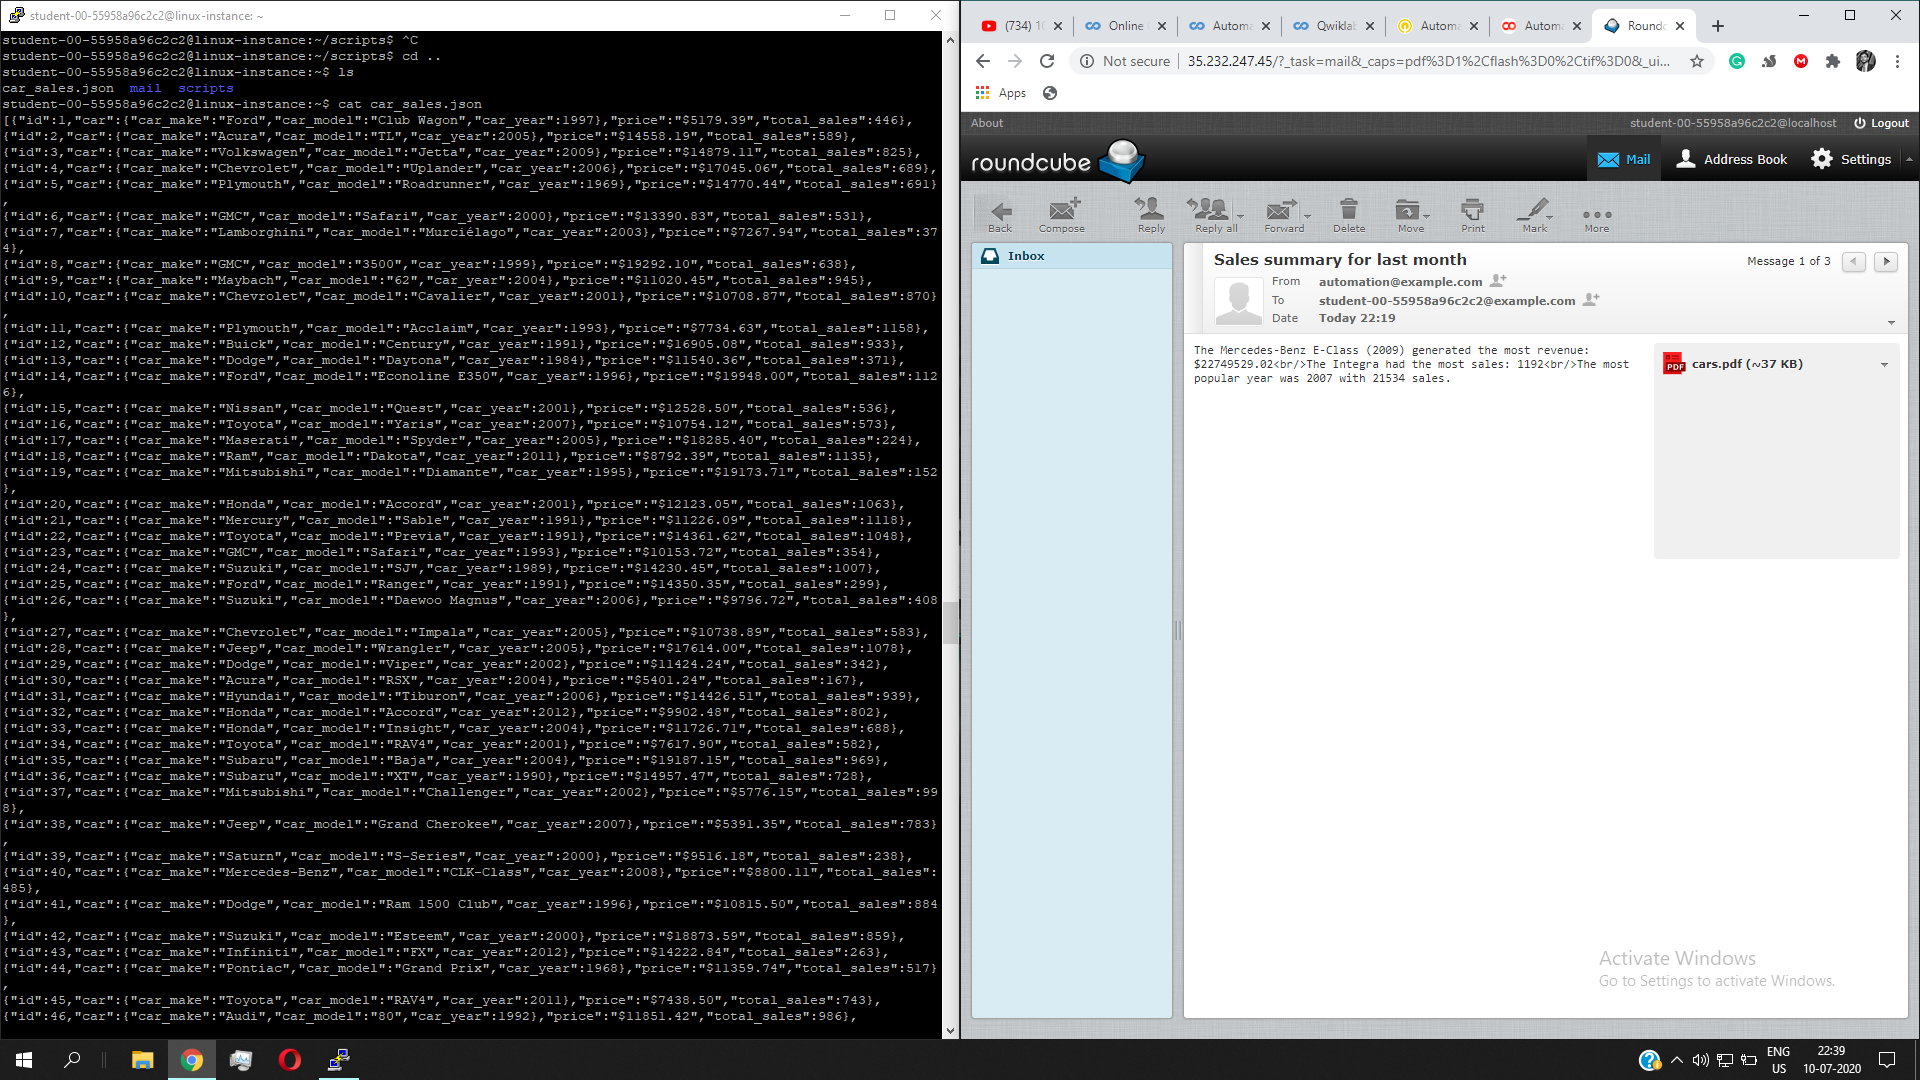


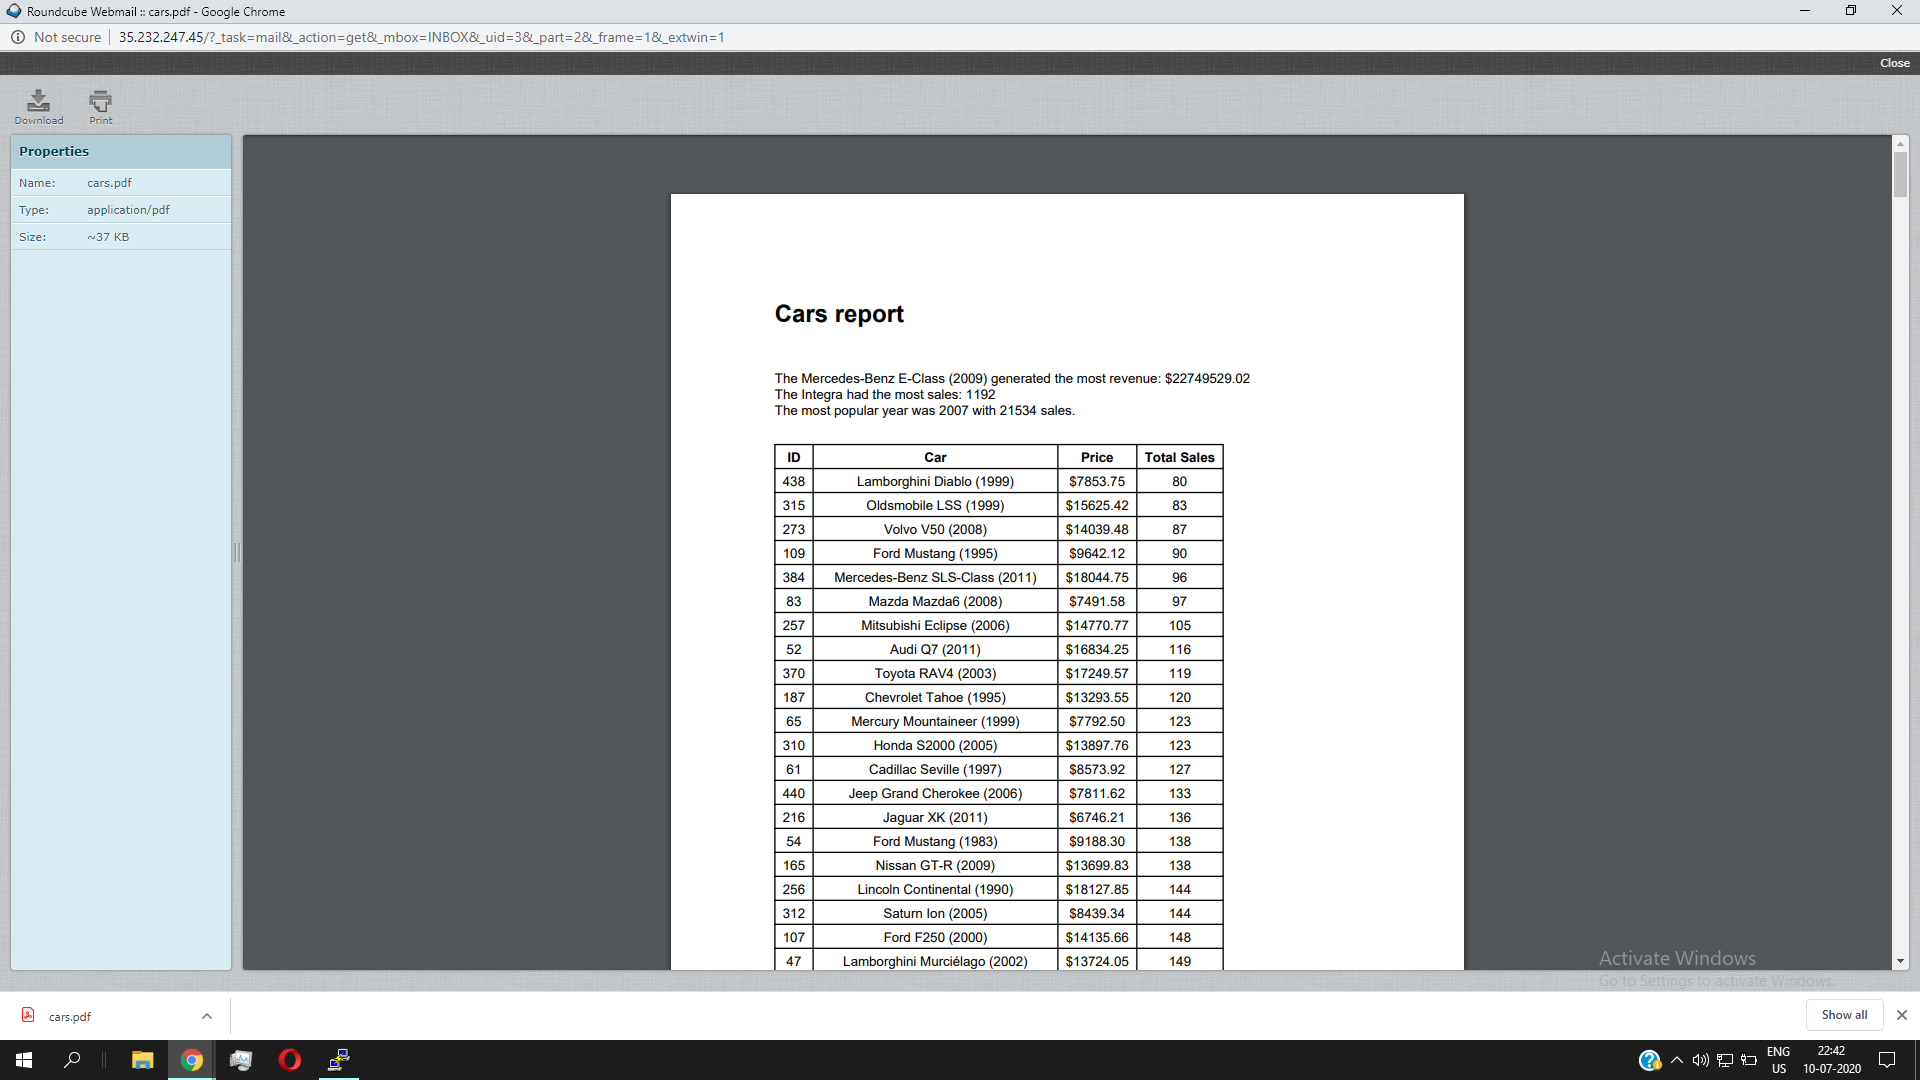
